<a href="https://colab.research.google.com/github/kluless13/fishtally/blob/test/wt_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Apr 15 06:21:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -U ultralytics
from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.3/201.2 GB disk)


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("vince-yuan-ortega-17drx").project("coralssi")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to CORALSSI-2 in yolov8:: 100%|██████████| 2530/2530 [00:00<00:00, 6447.05it/s]


In [10]:
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("parvej-hosen").project("cuttle_fish")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Cuttle_fish-1 in yolov8:: 100%|██████████| 4628/4628 [00:00<00:00, 4828.25it/s]


In [11]:
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("jai-wpa2a").project("crab-detection-8oljw")
version = project.version(9)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Crab-Detection-9 in yolov8:: 100%|██████████| 7802/7802 [00:01<00:00, 6497.85it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/CORALSSI-2/data.yaml epochs=25 imgsz=800

/content
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/CORALSSI-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1713162871.3e7877e2ce3e.4851.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1725.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1726.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1727.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


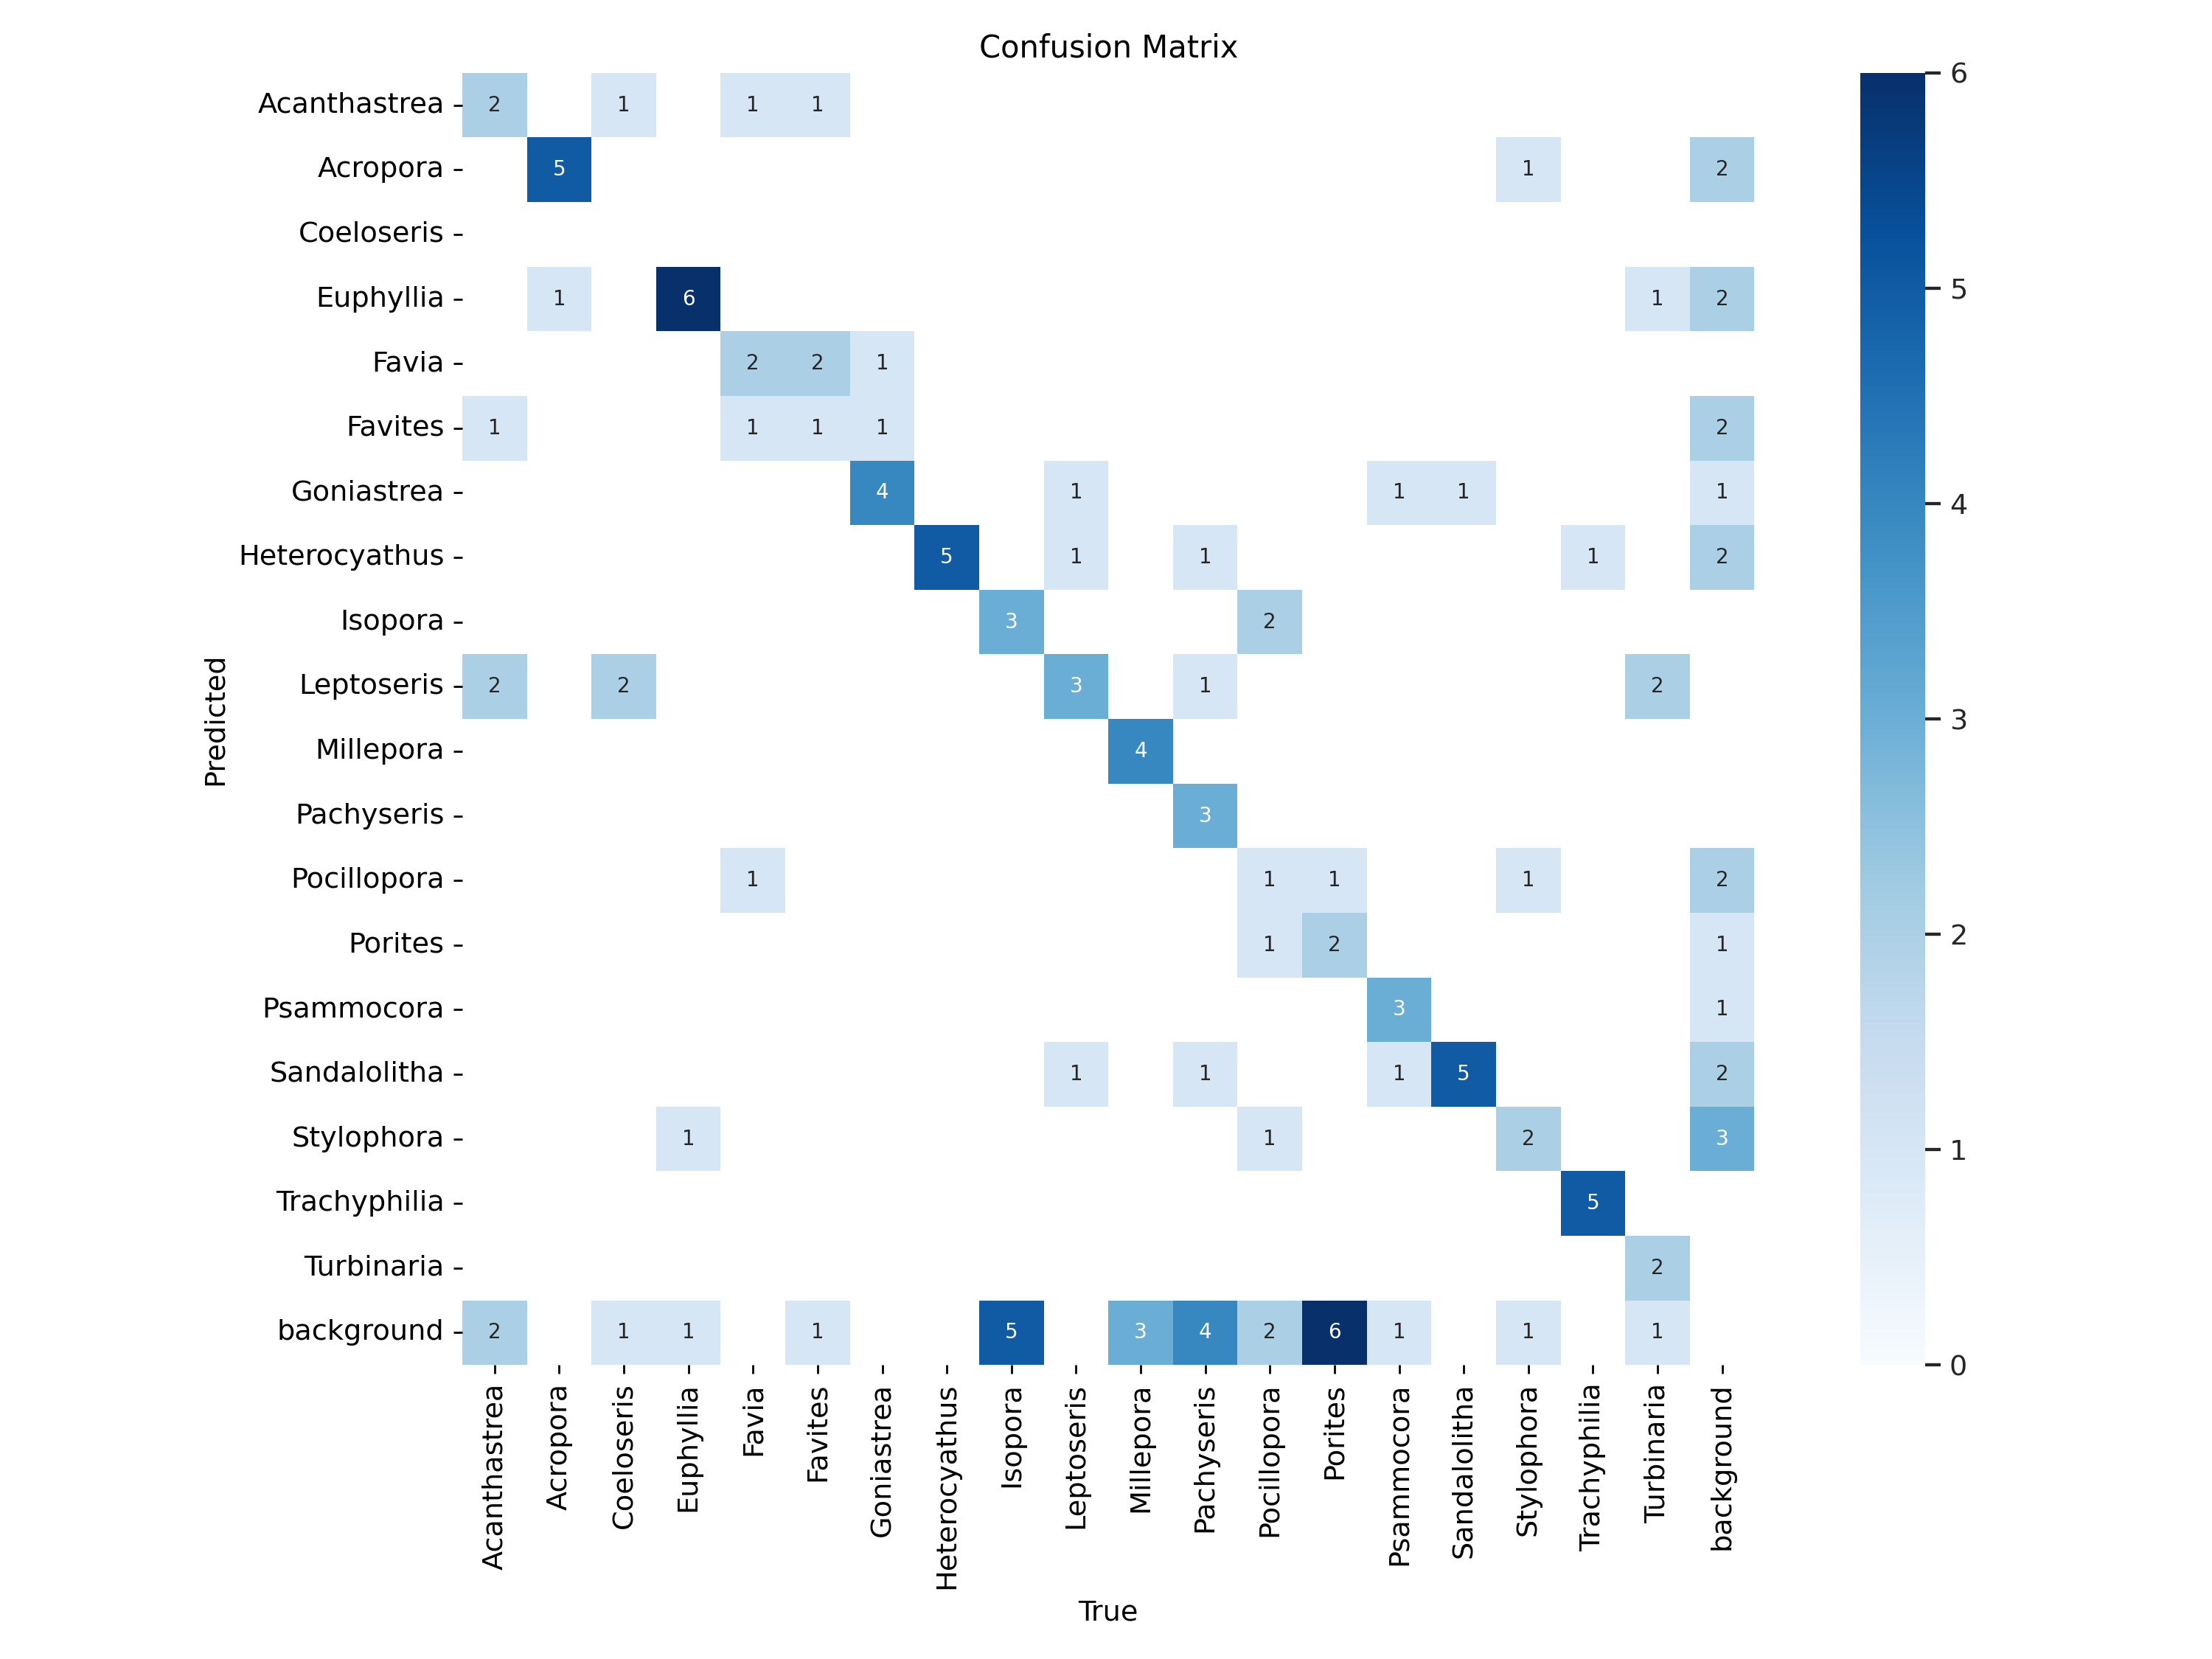

In [7]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


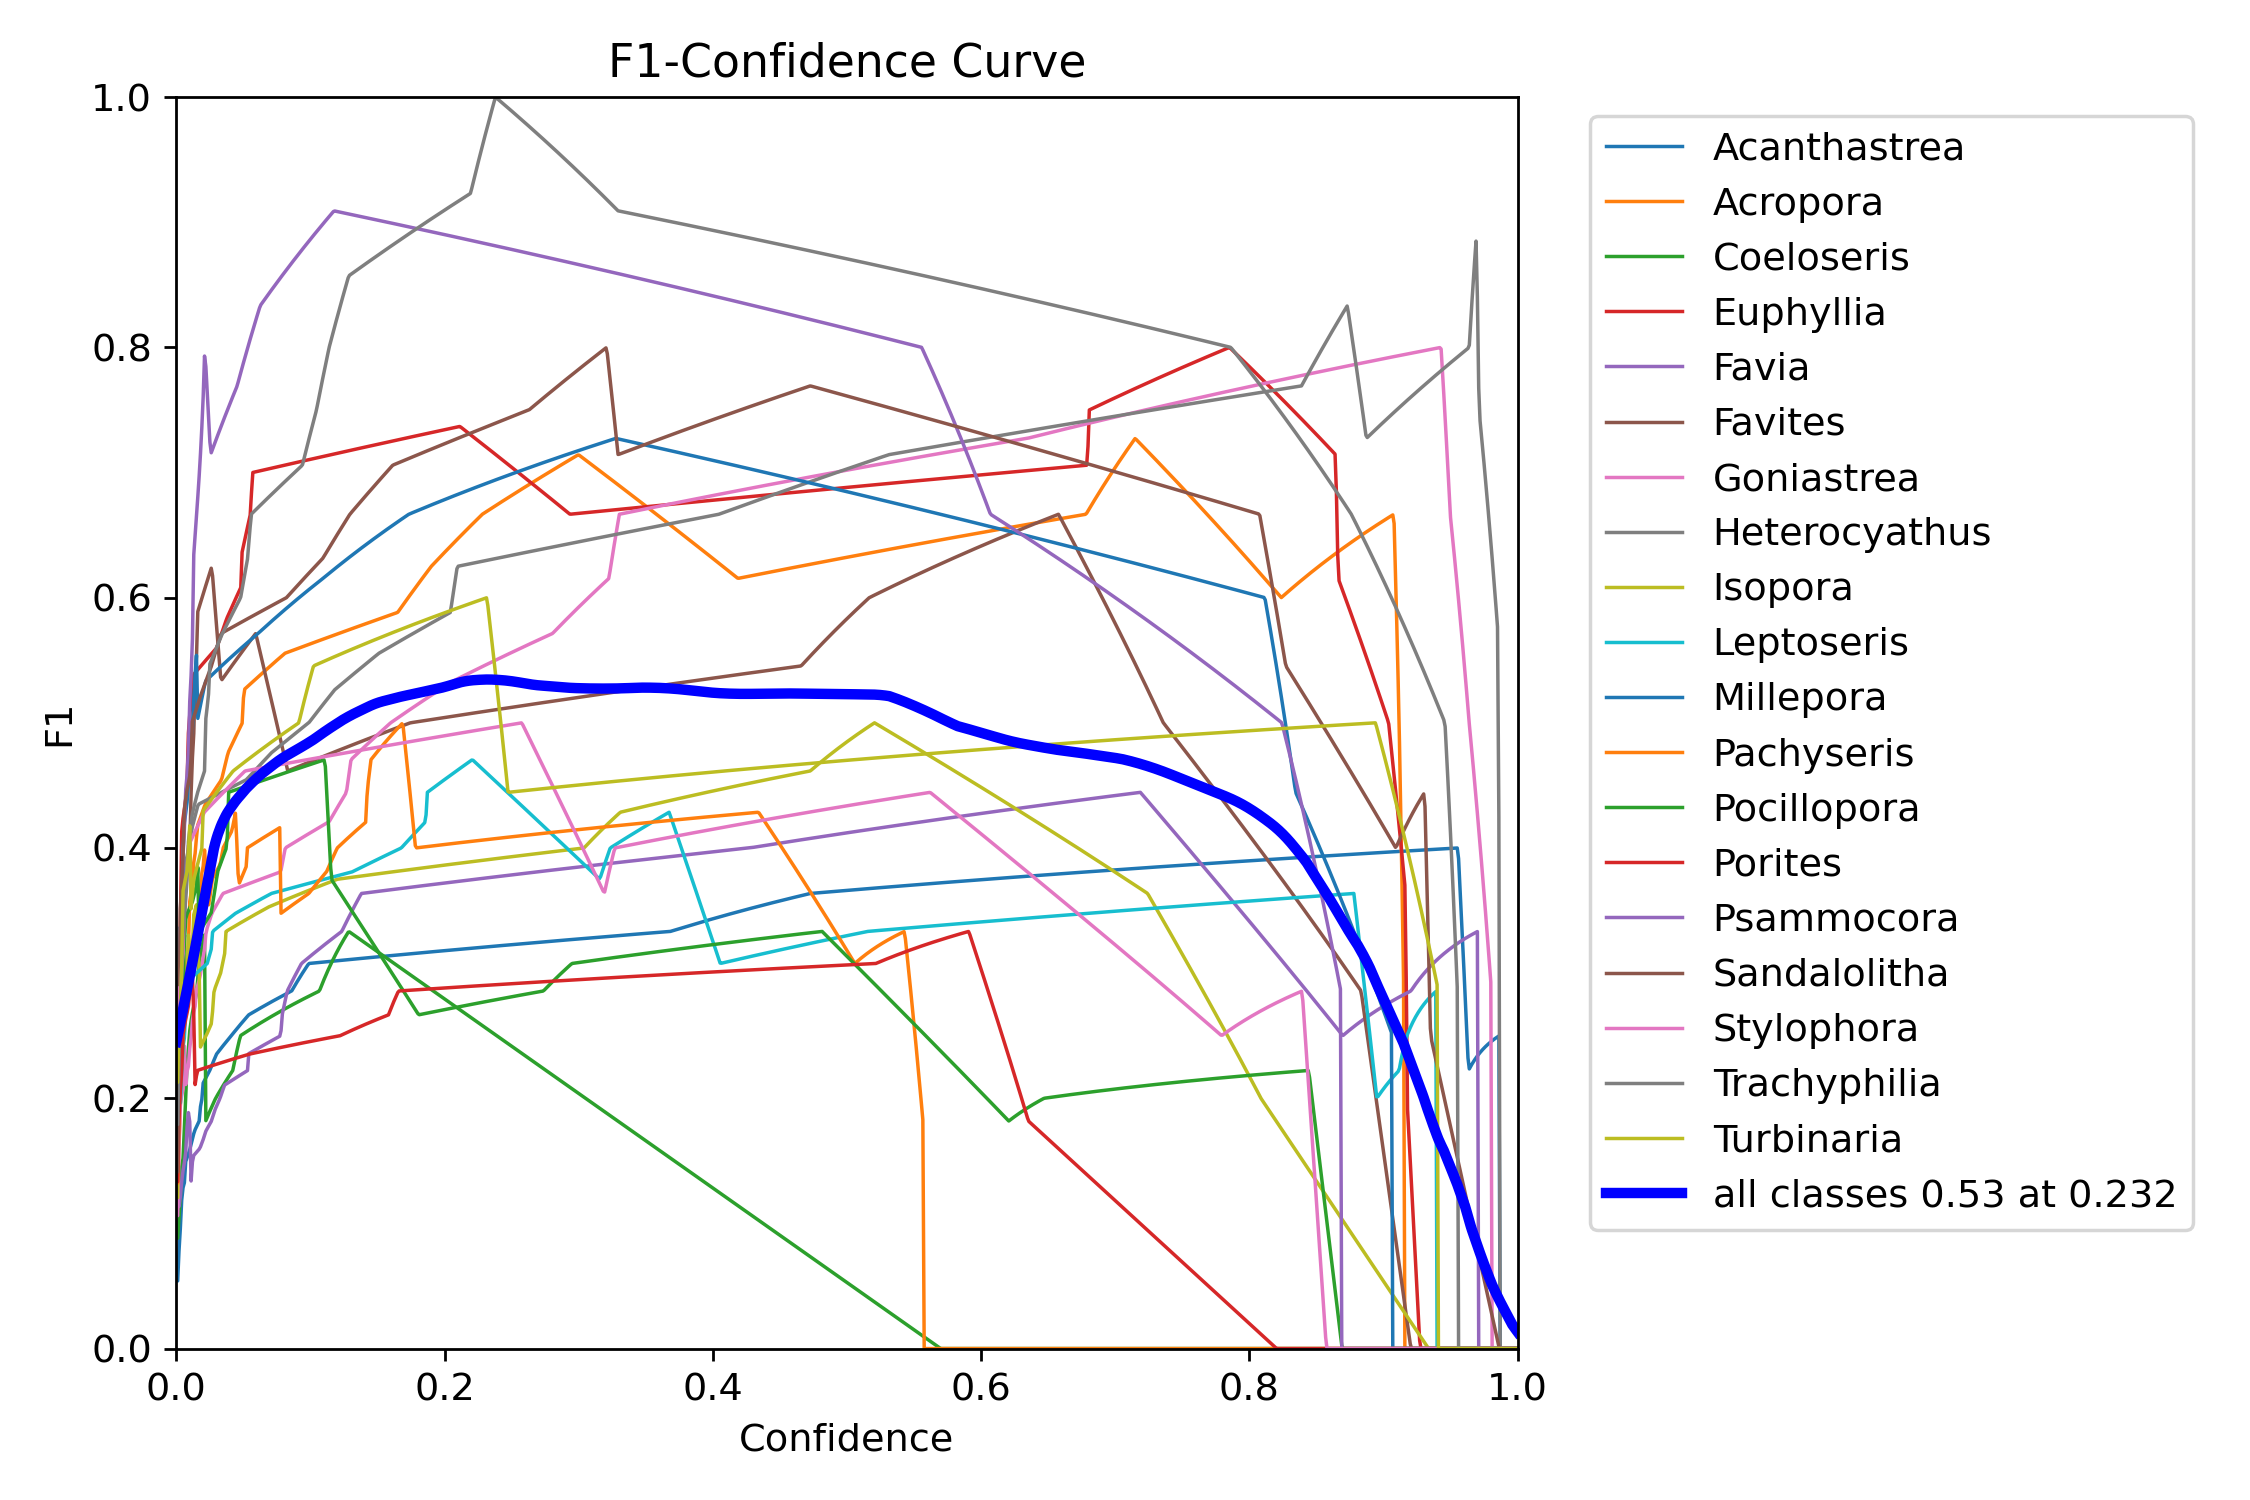

In [8]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


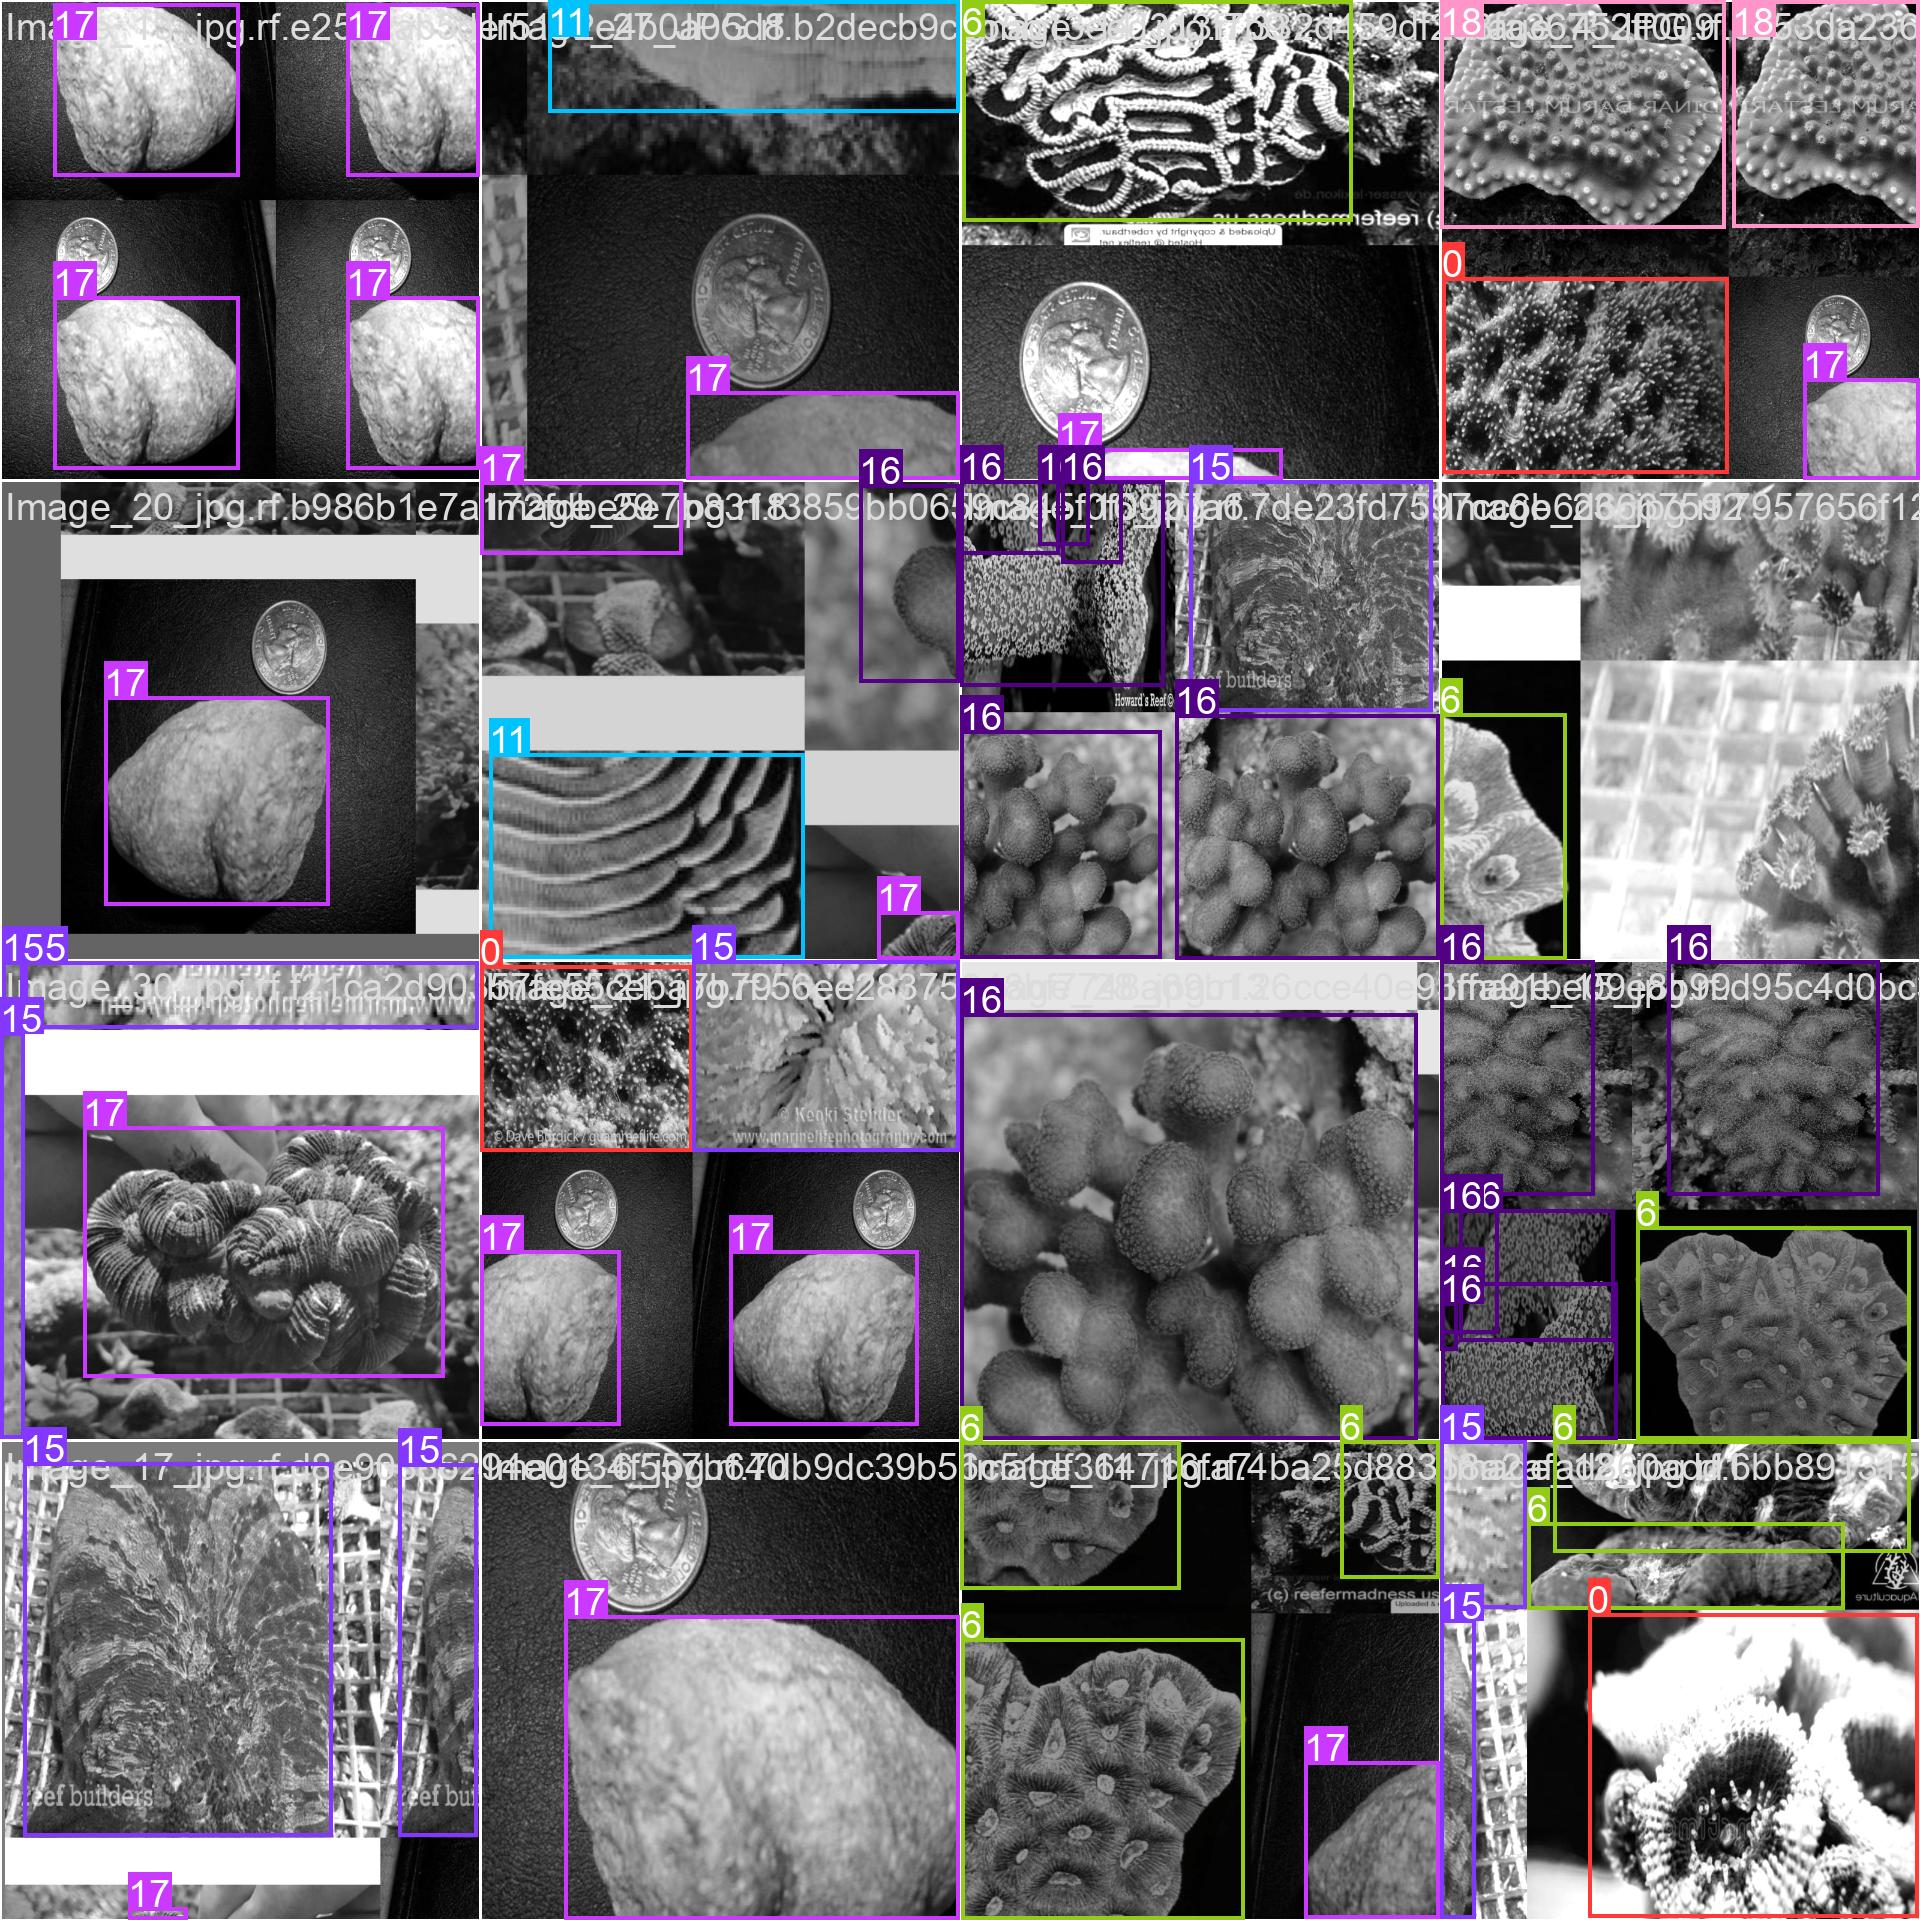

In [11]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

/content


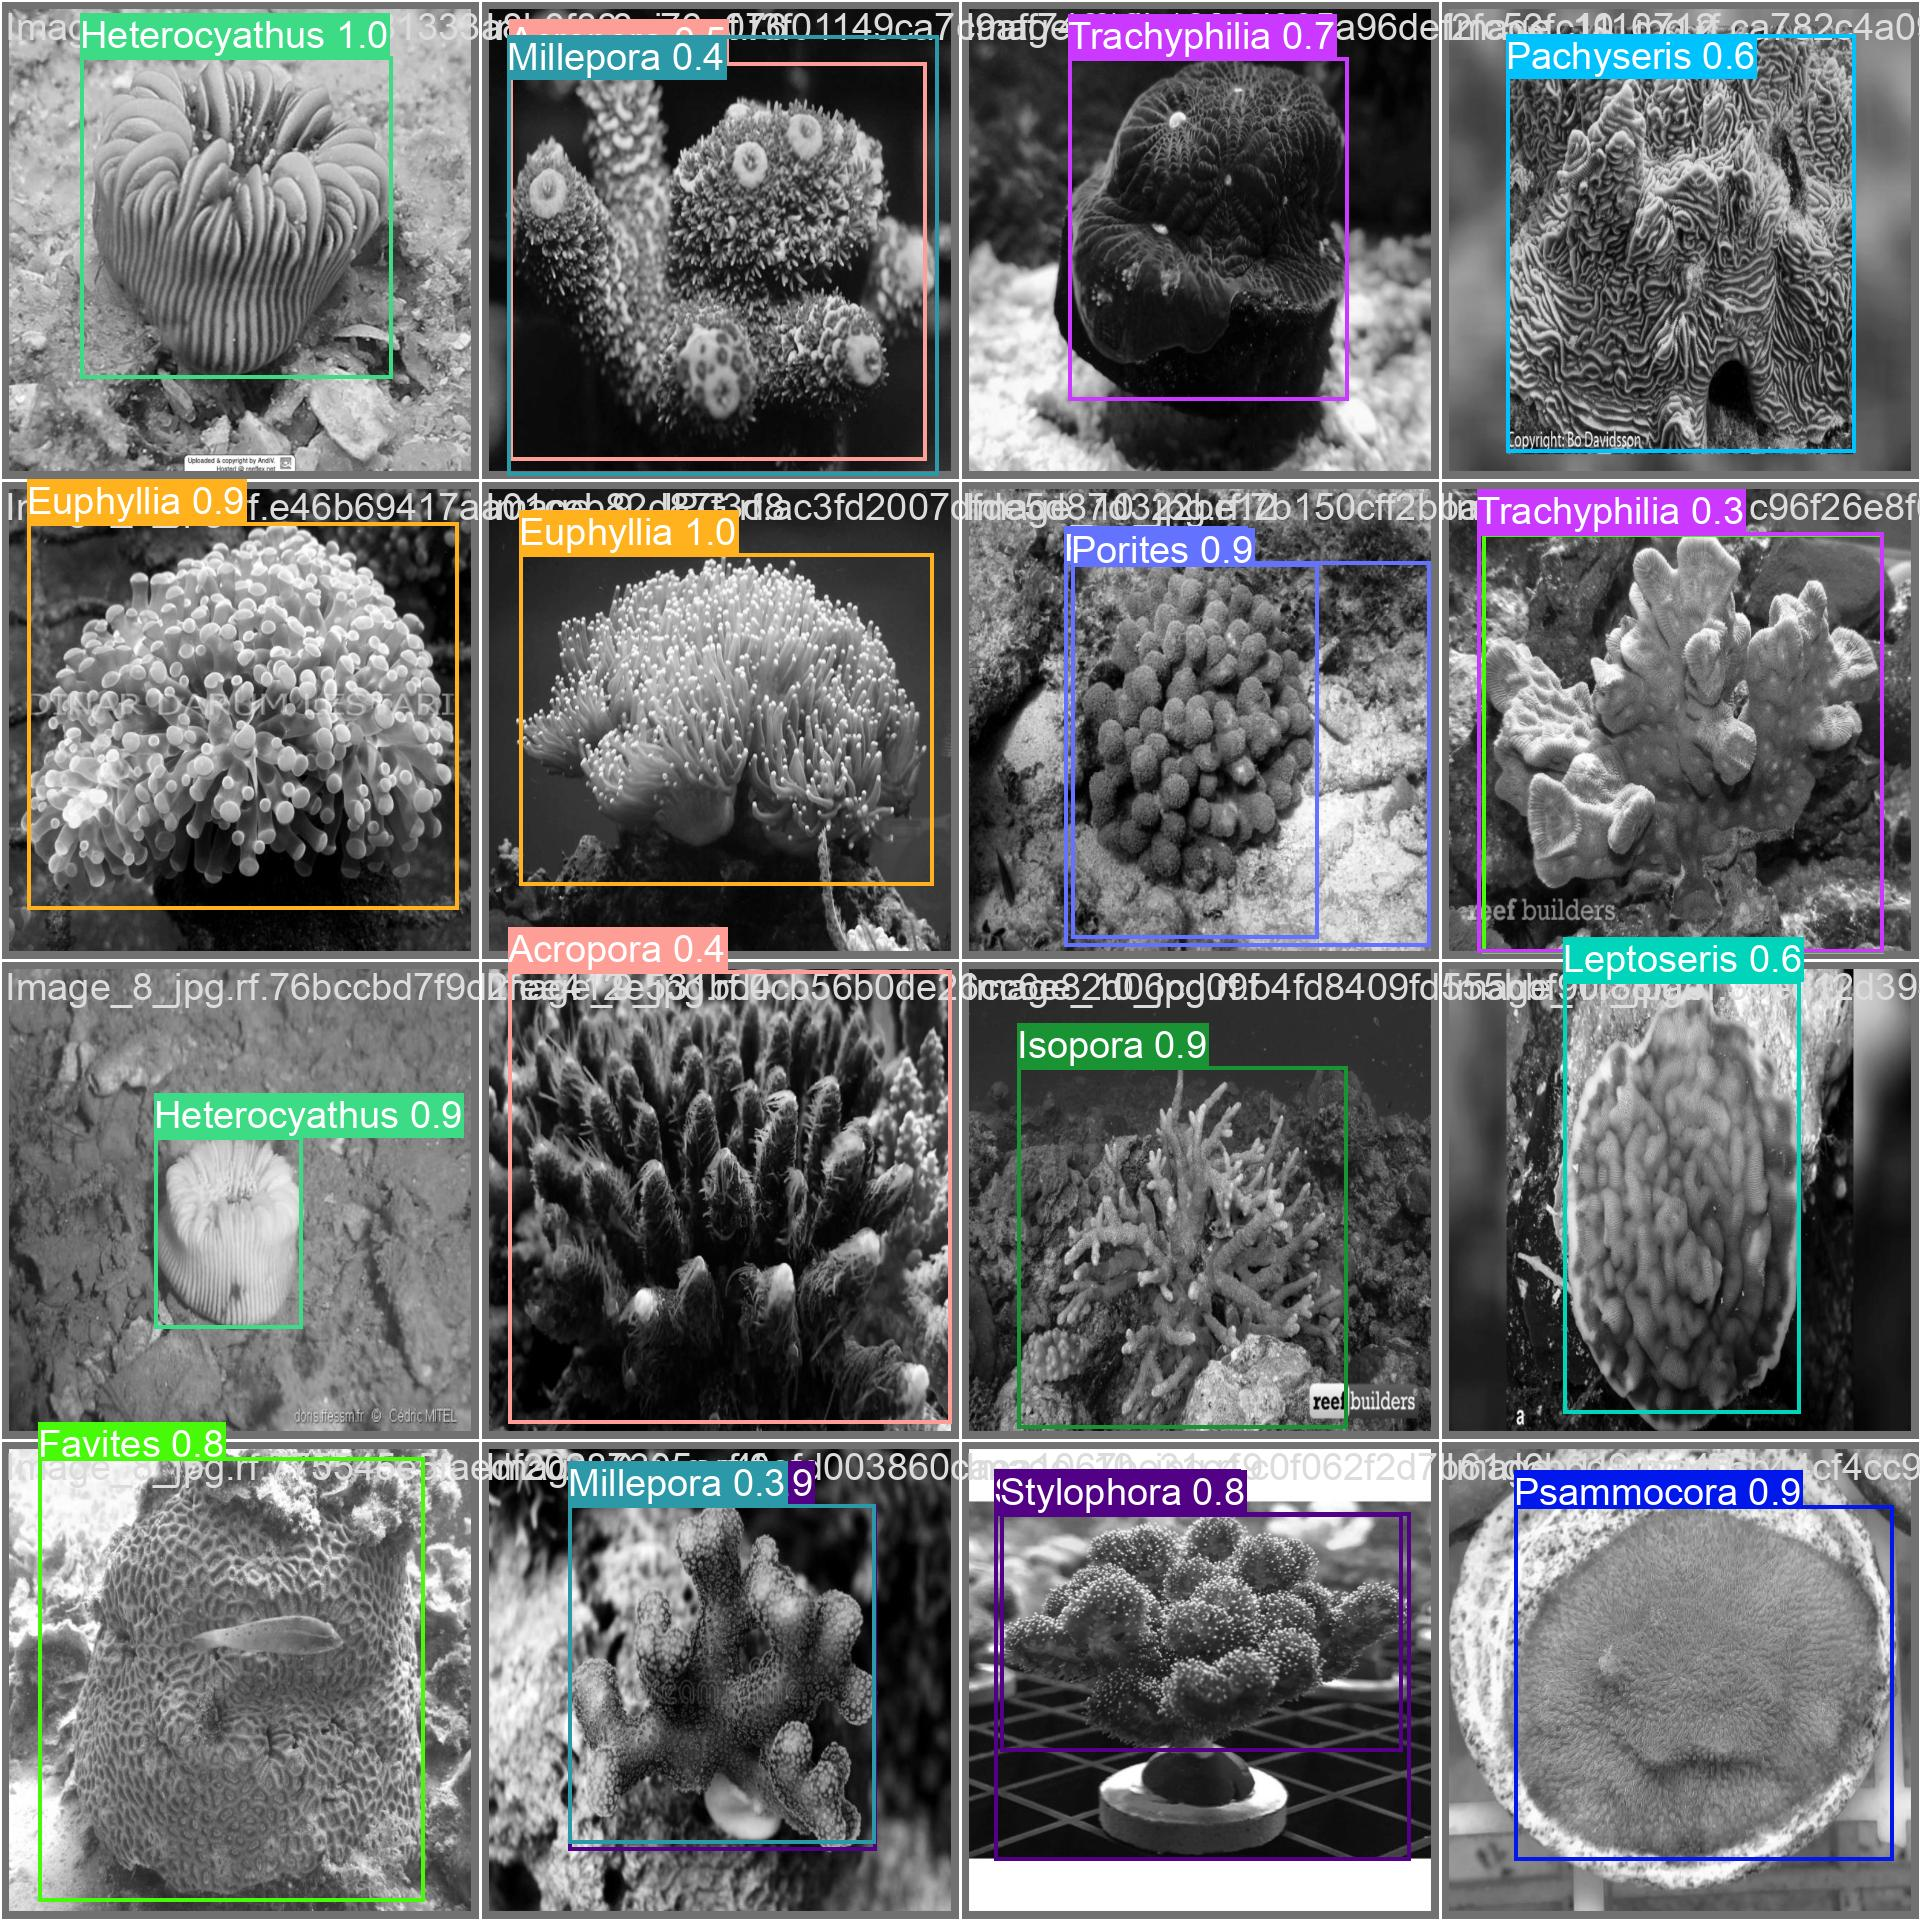

In [12]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [4]:
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("ai-utfea").project("fish-detection-tjtku")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fish-Detection-1 in yolov8:: 100%|██████████| 1314/1314 [00:00<00:00, 7770.38it/s]


In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/CORALSSI-2/data.yaml epochs=35 imgsz=800

/content
100% 49.7M/49.7M [00:00<00:00, 65.8MB/s]
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/CORALSSI-2/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/Fish-Detection-1/data.yaml epochs=35 imgsz=800

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Fish-Detection-1/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

In [12]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/Cuttle_fish-1/data.yaml epochs=35 imgsz=800 freeze = [1-20]

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Cuttle_fish-1/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[-19], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

### Freezing and weight transfer between datasets (cuttlefish and crabs)

In [13]:
!ls /content/runs/detect/train3

args.yaml					     PR_curve.png	  train_batch3526.jpg
confusion_matrix_normalized.png			     R_curve.png	  train_batch3527.jpg
confusion_matrix.png				     results.csv	  val_batch0_labels.jpg
events.out.tfevents.1713169903.3e7877e2ce3e.34973.0  results.png	  val_batch0_pred.jpg
F1_curve.png					     train_batch0.jpg	  val_batch1_labels.jpg
labels_correlogram.jpg				     train_batch1.jpg	  val_batch1_pred.jpg
labels.jpg					     train_batch2.jpg	  weights
P_curve.png					     train_batch3525.jpg


/content


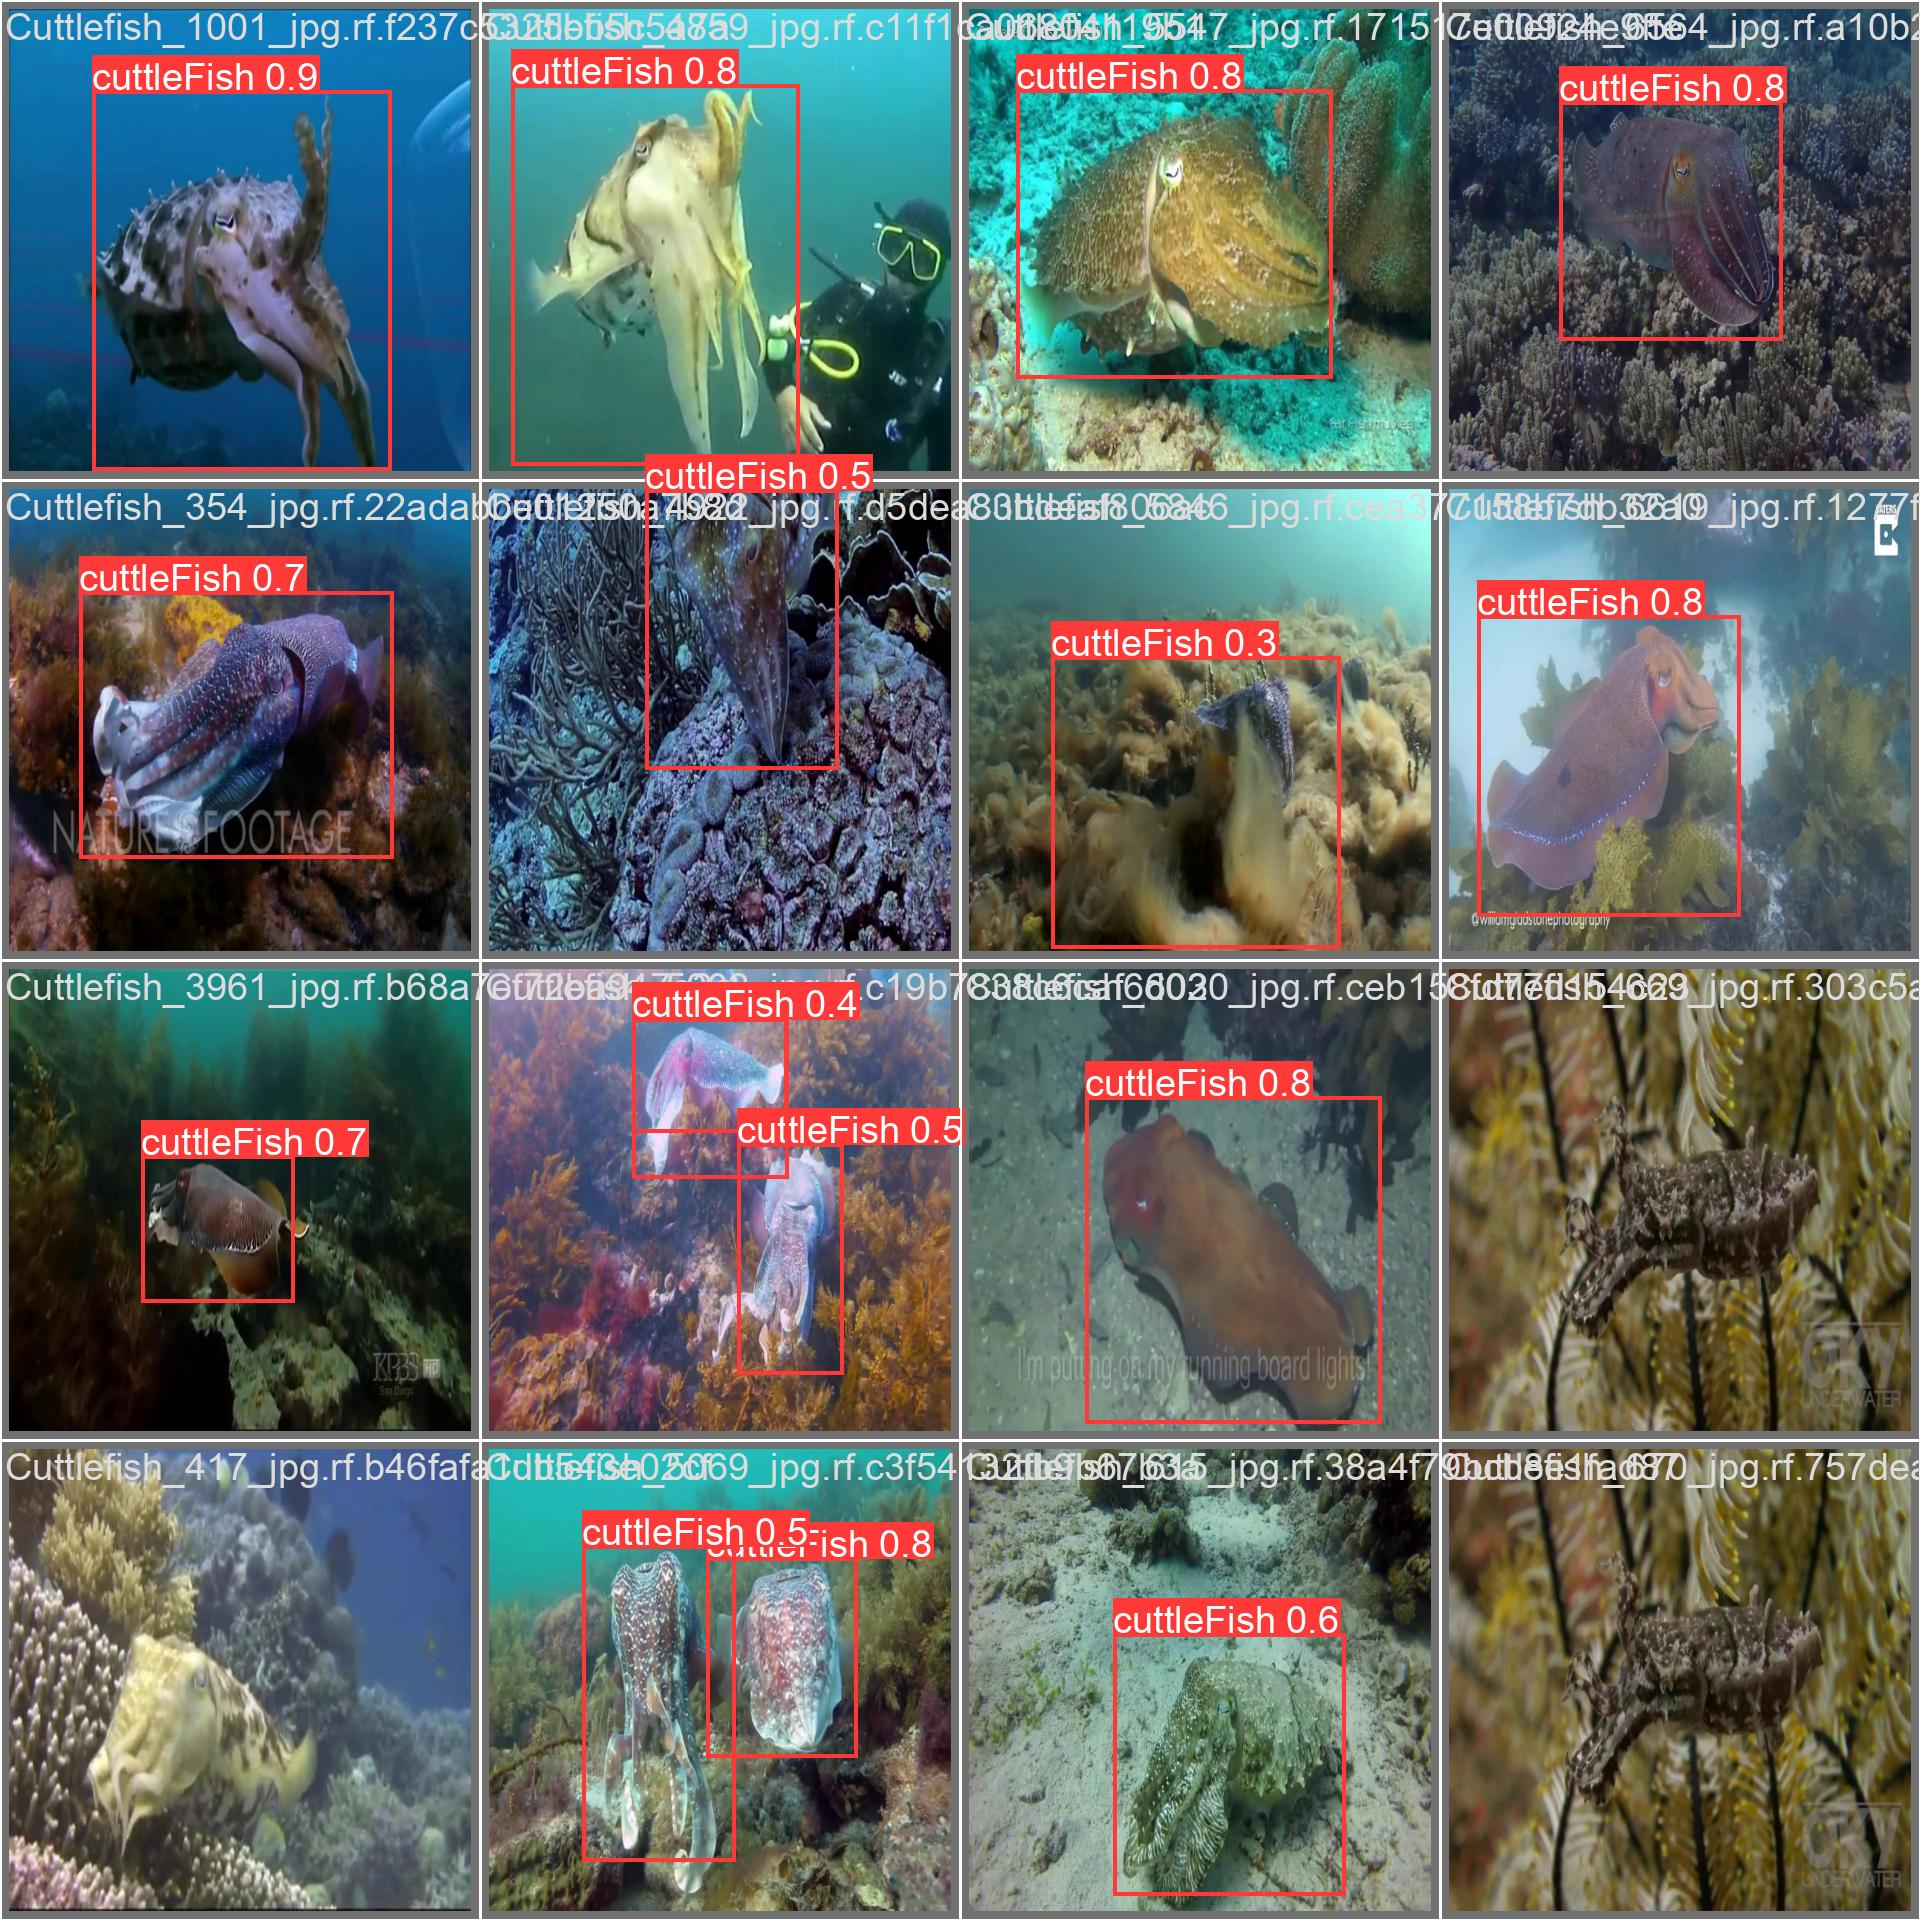

In [14]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

/content


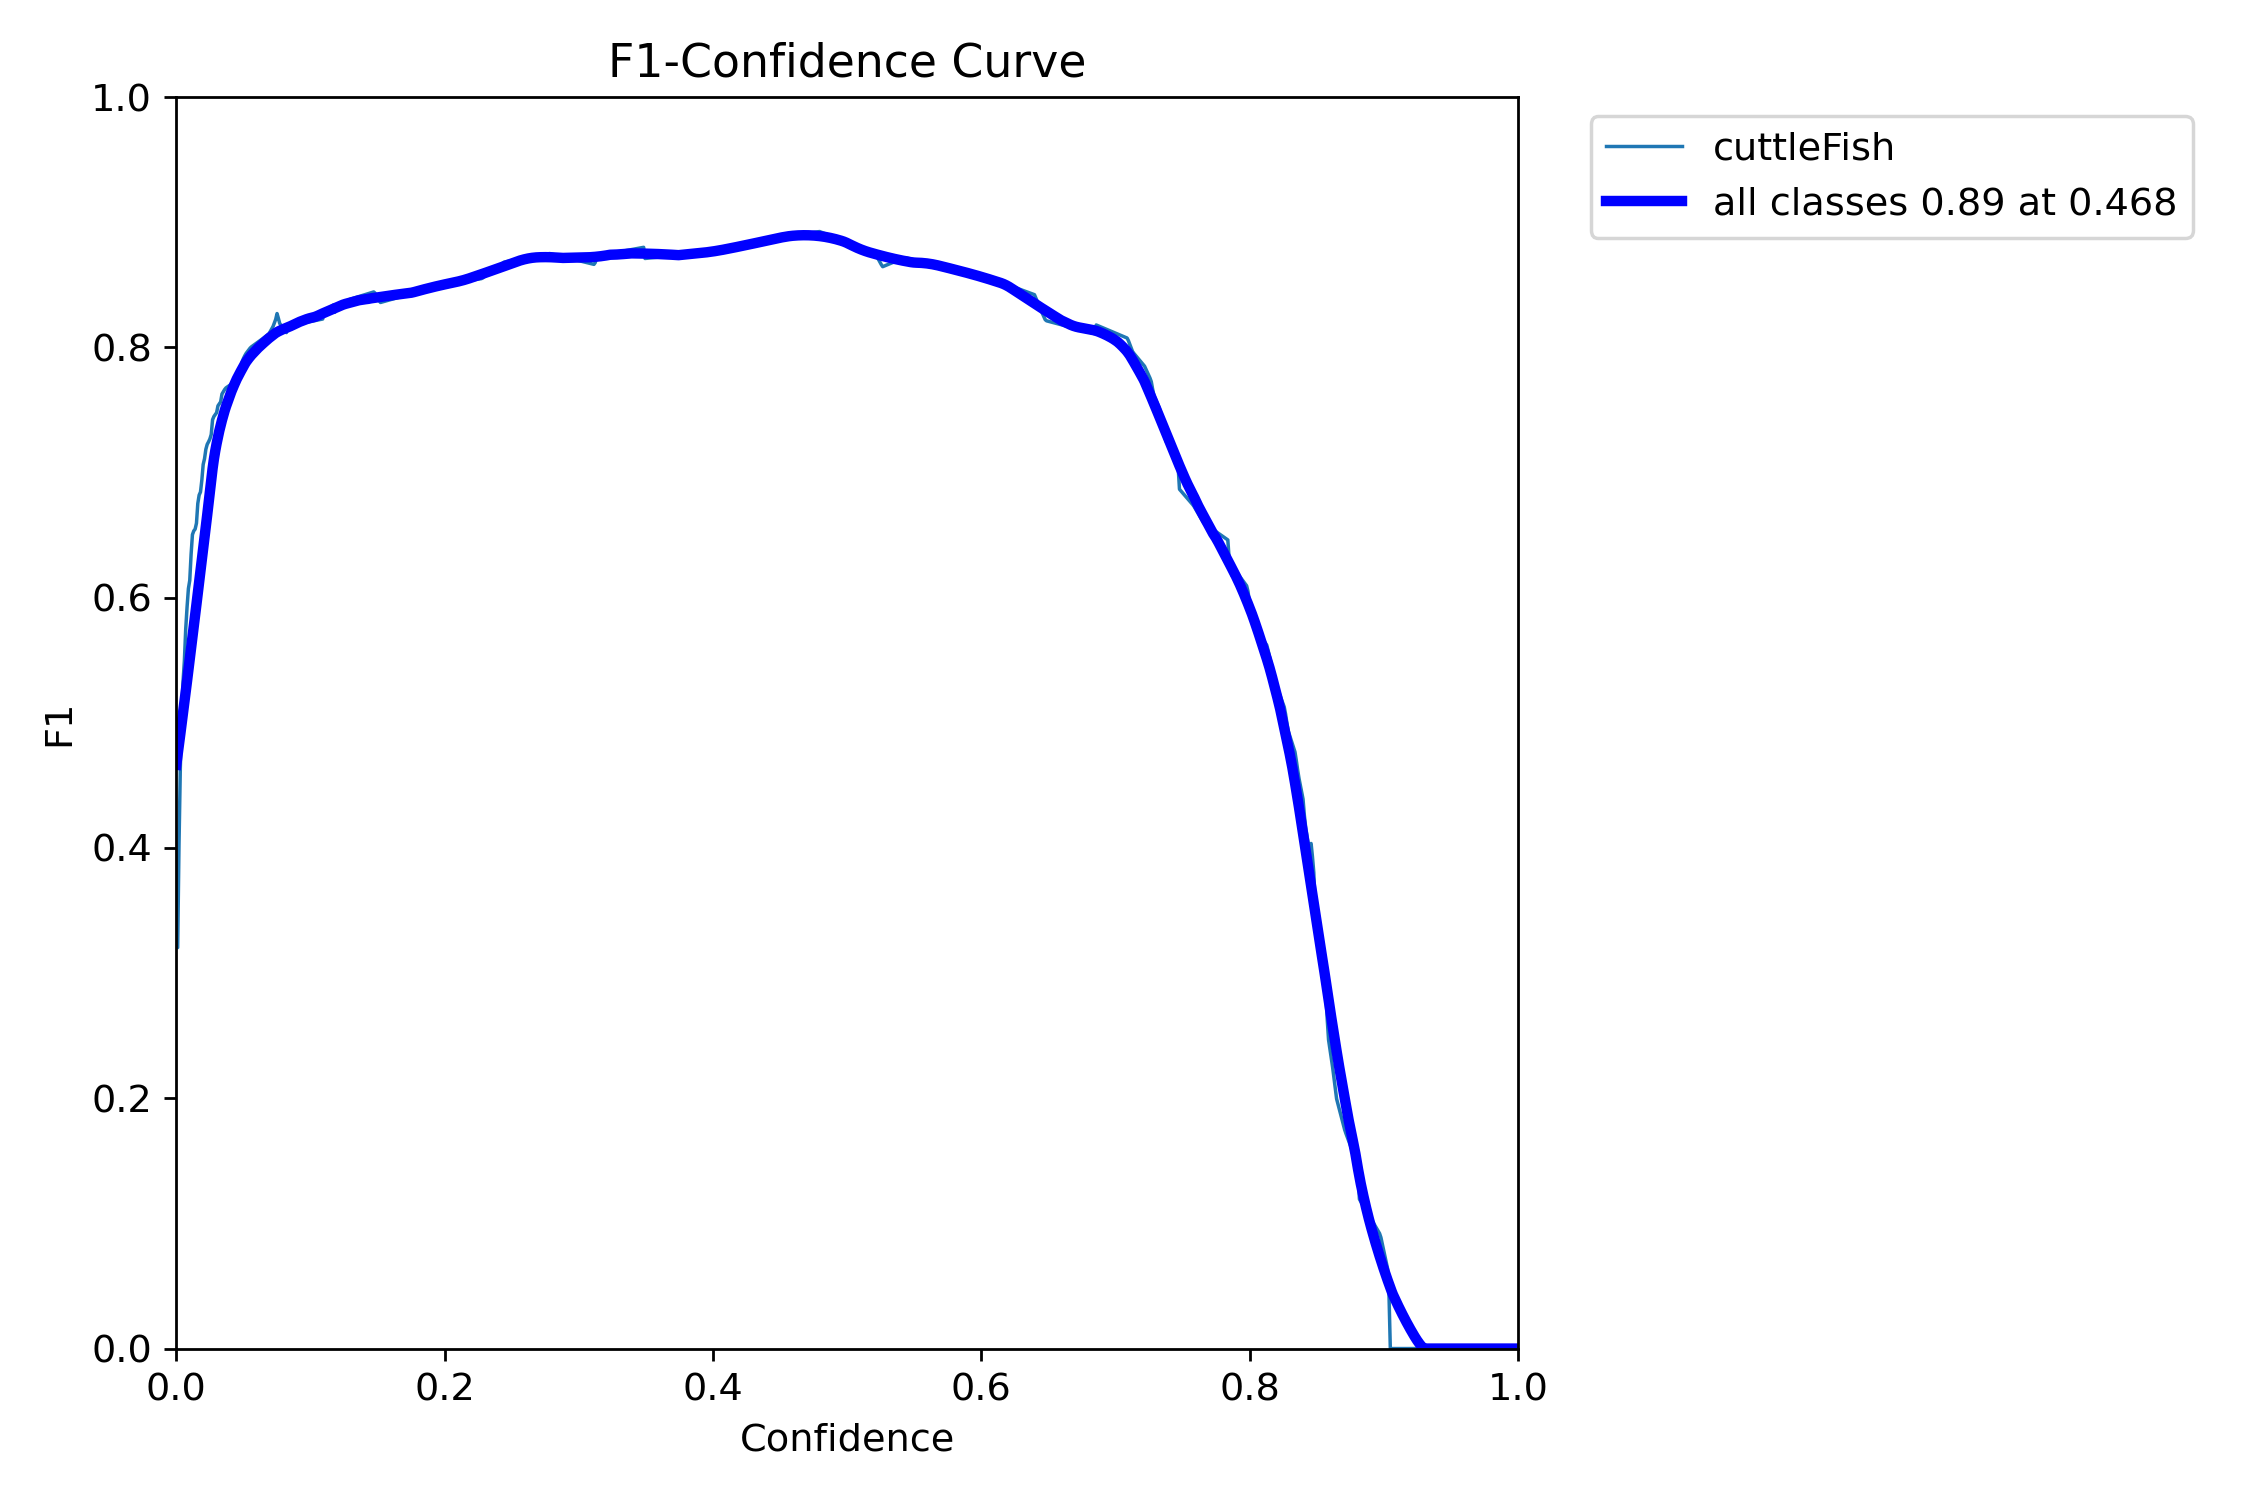

In [15]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train3/F1_curve.png', width=600)

/content


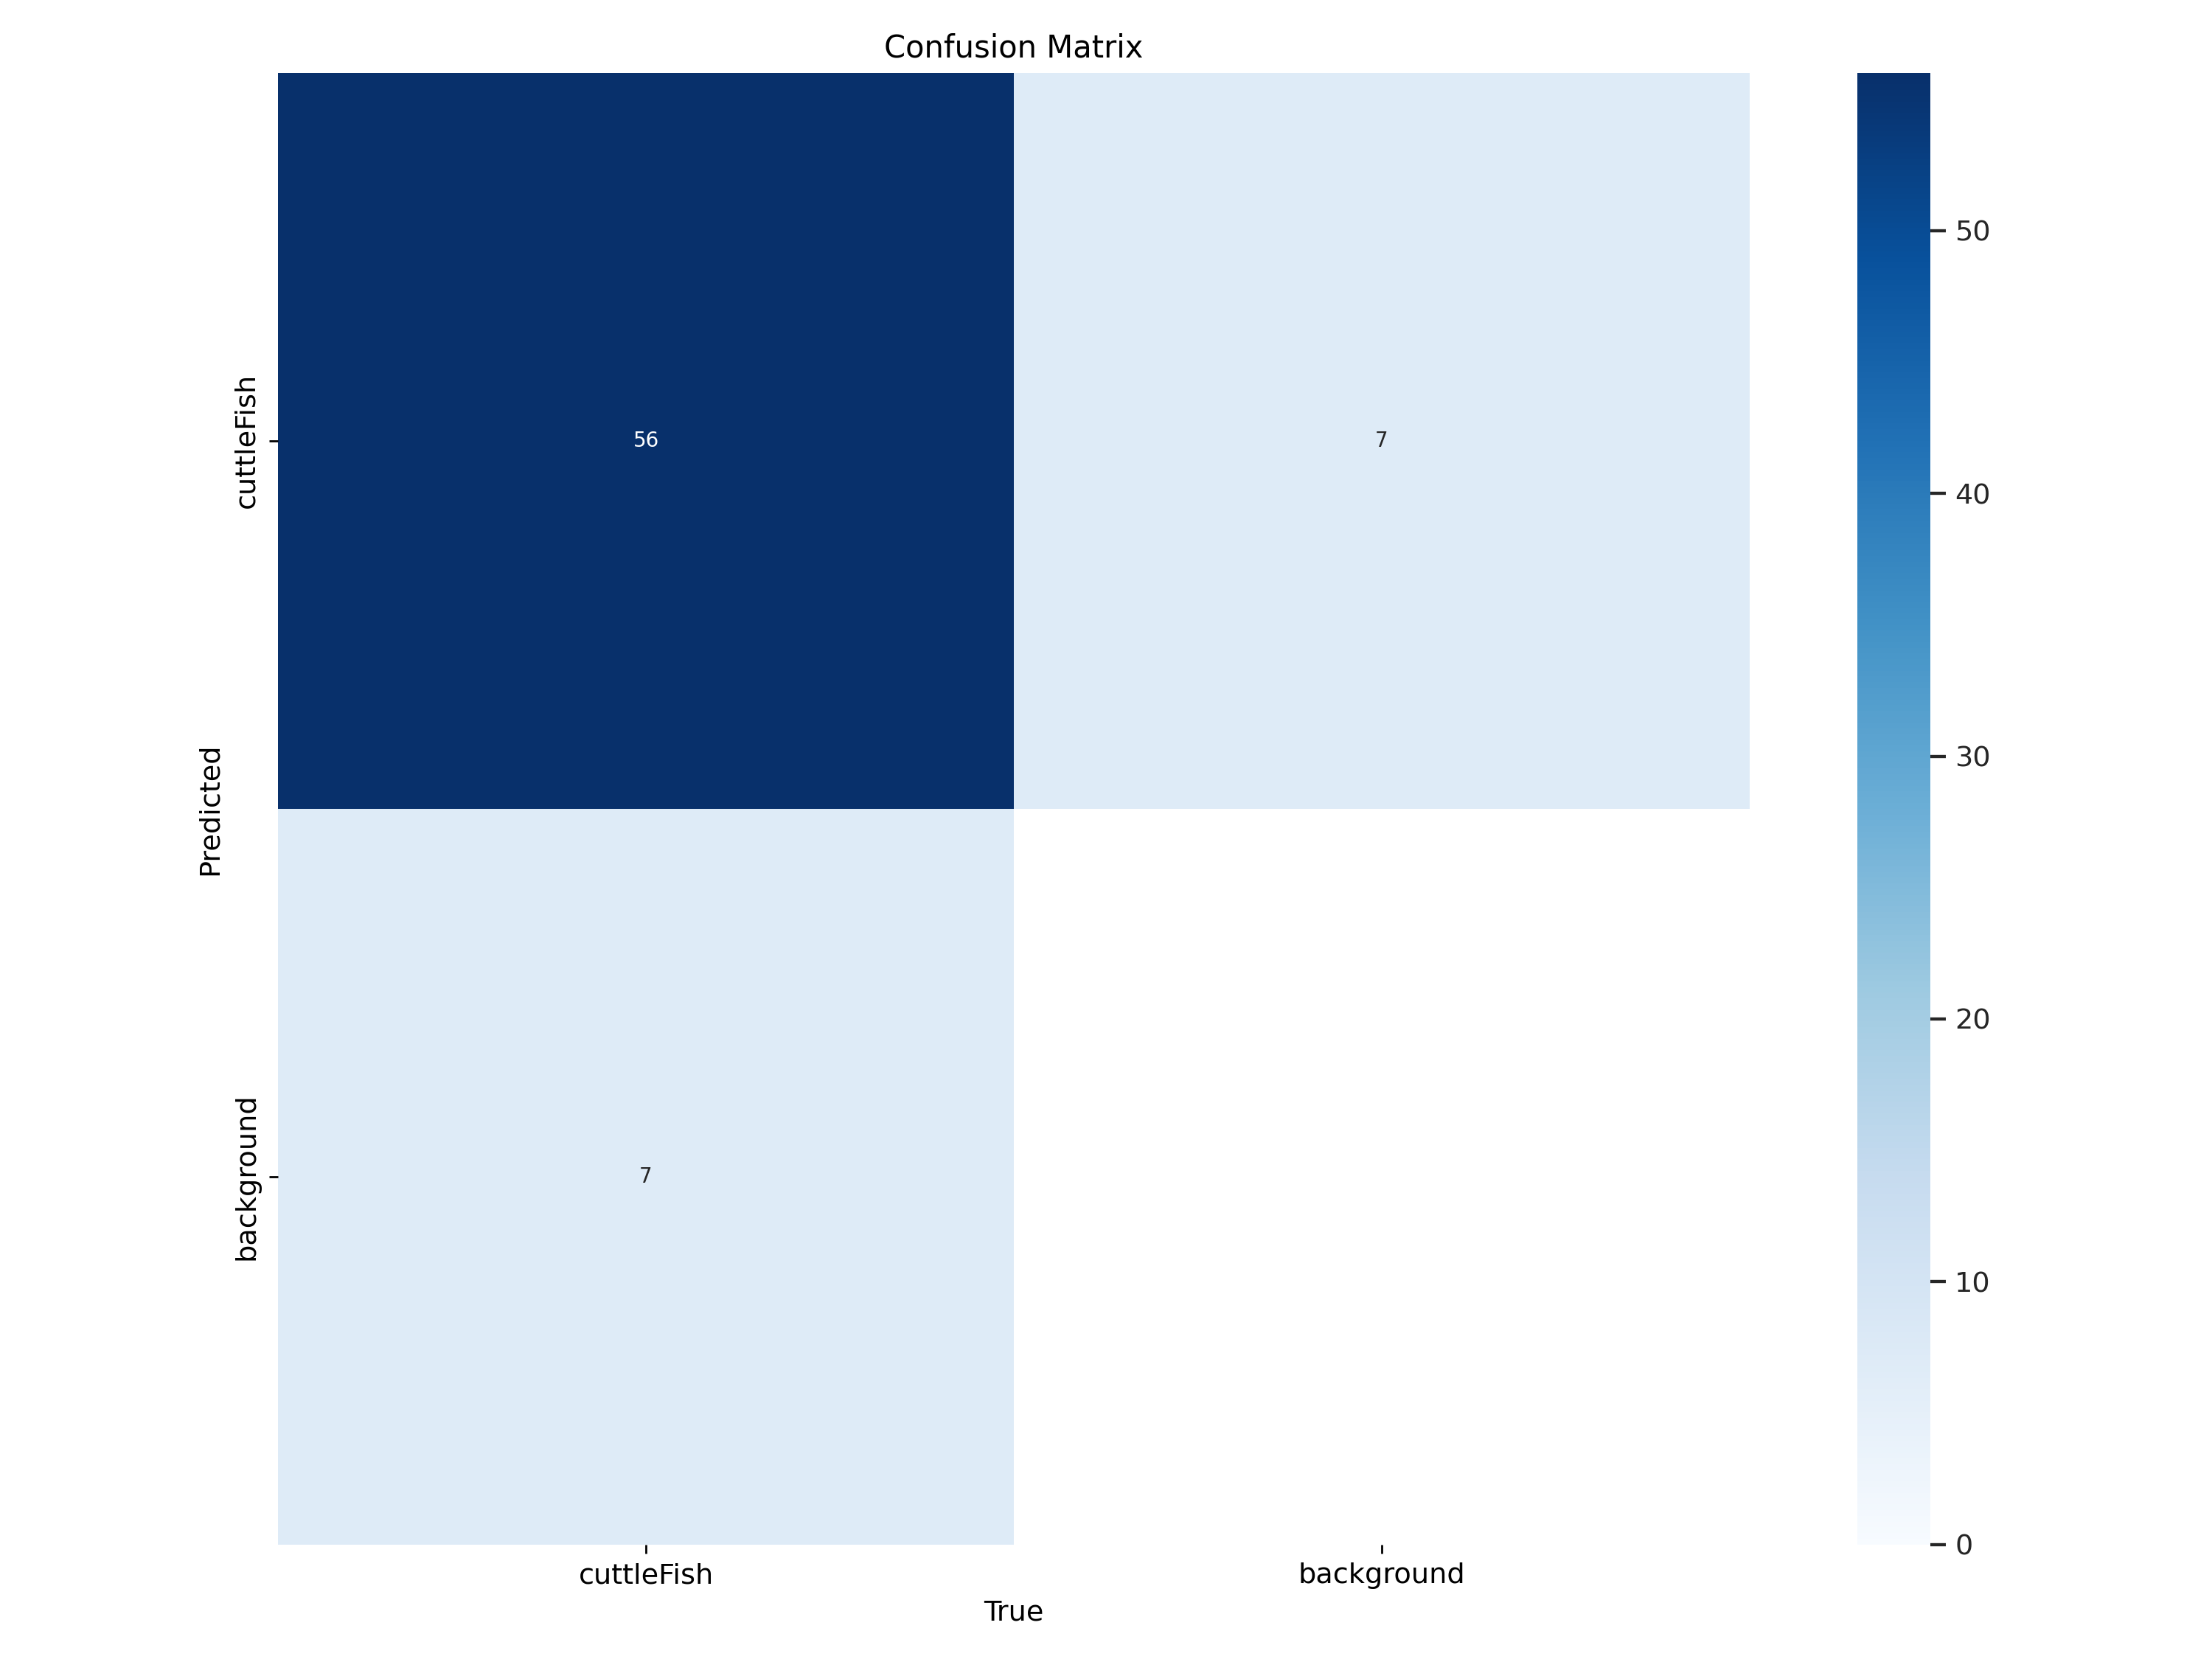

In [16]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

In [17]:
%cd {HOME}

!yolo task=detect mode=train model= /content/runs/detect/train3/weights/freeze.pt data= /content/datasets/Crab-Detection-9/data.yaml epochs=35 imgsz=800

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/freeze.pt, data=/content/datasets/Crab-Detection-9/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

In [18]:
!ls /content/runs/detect/train4

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1713174837.3e7877e2ce3e.55684.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch5625.jpg  weights
P_curve.png					     train_batch5626.jpg
PR_curve.png					     train_batch5627.jpg


/content


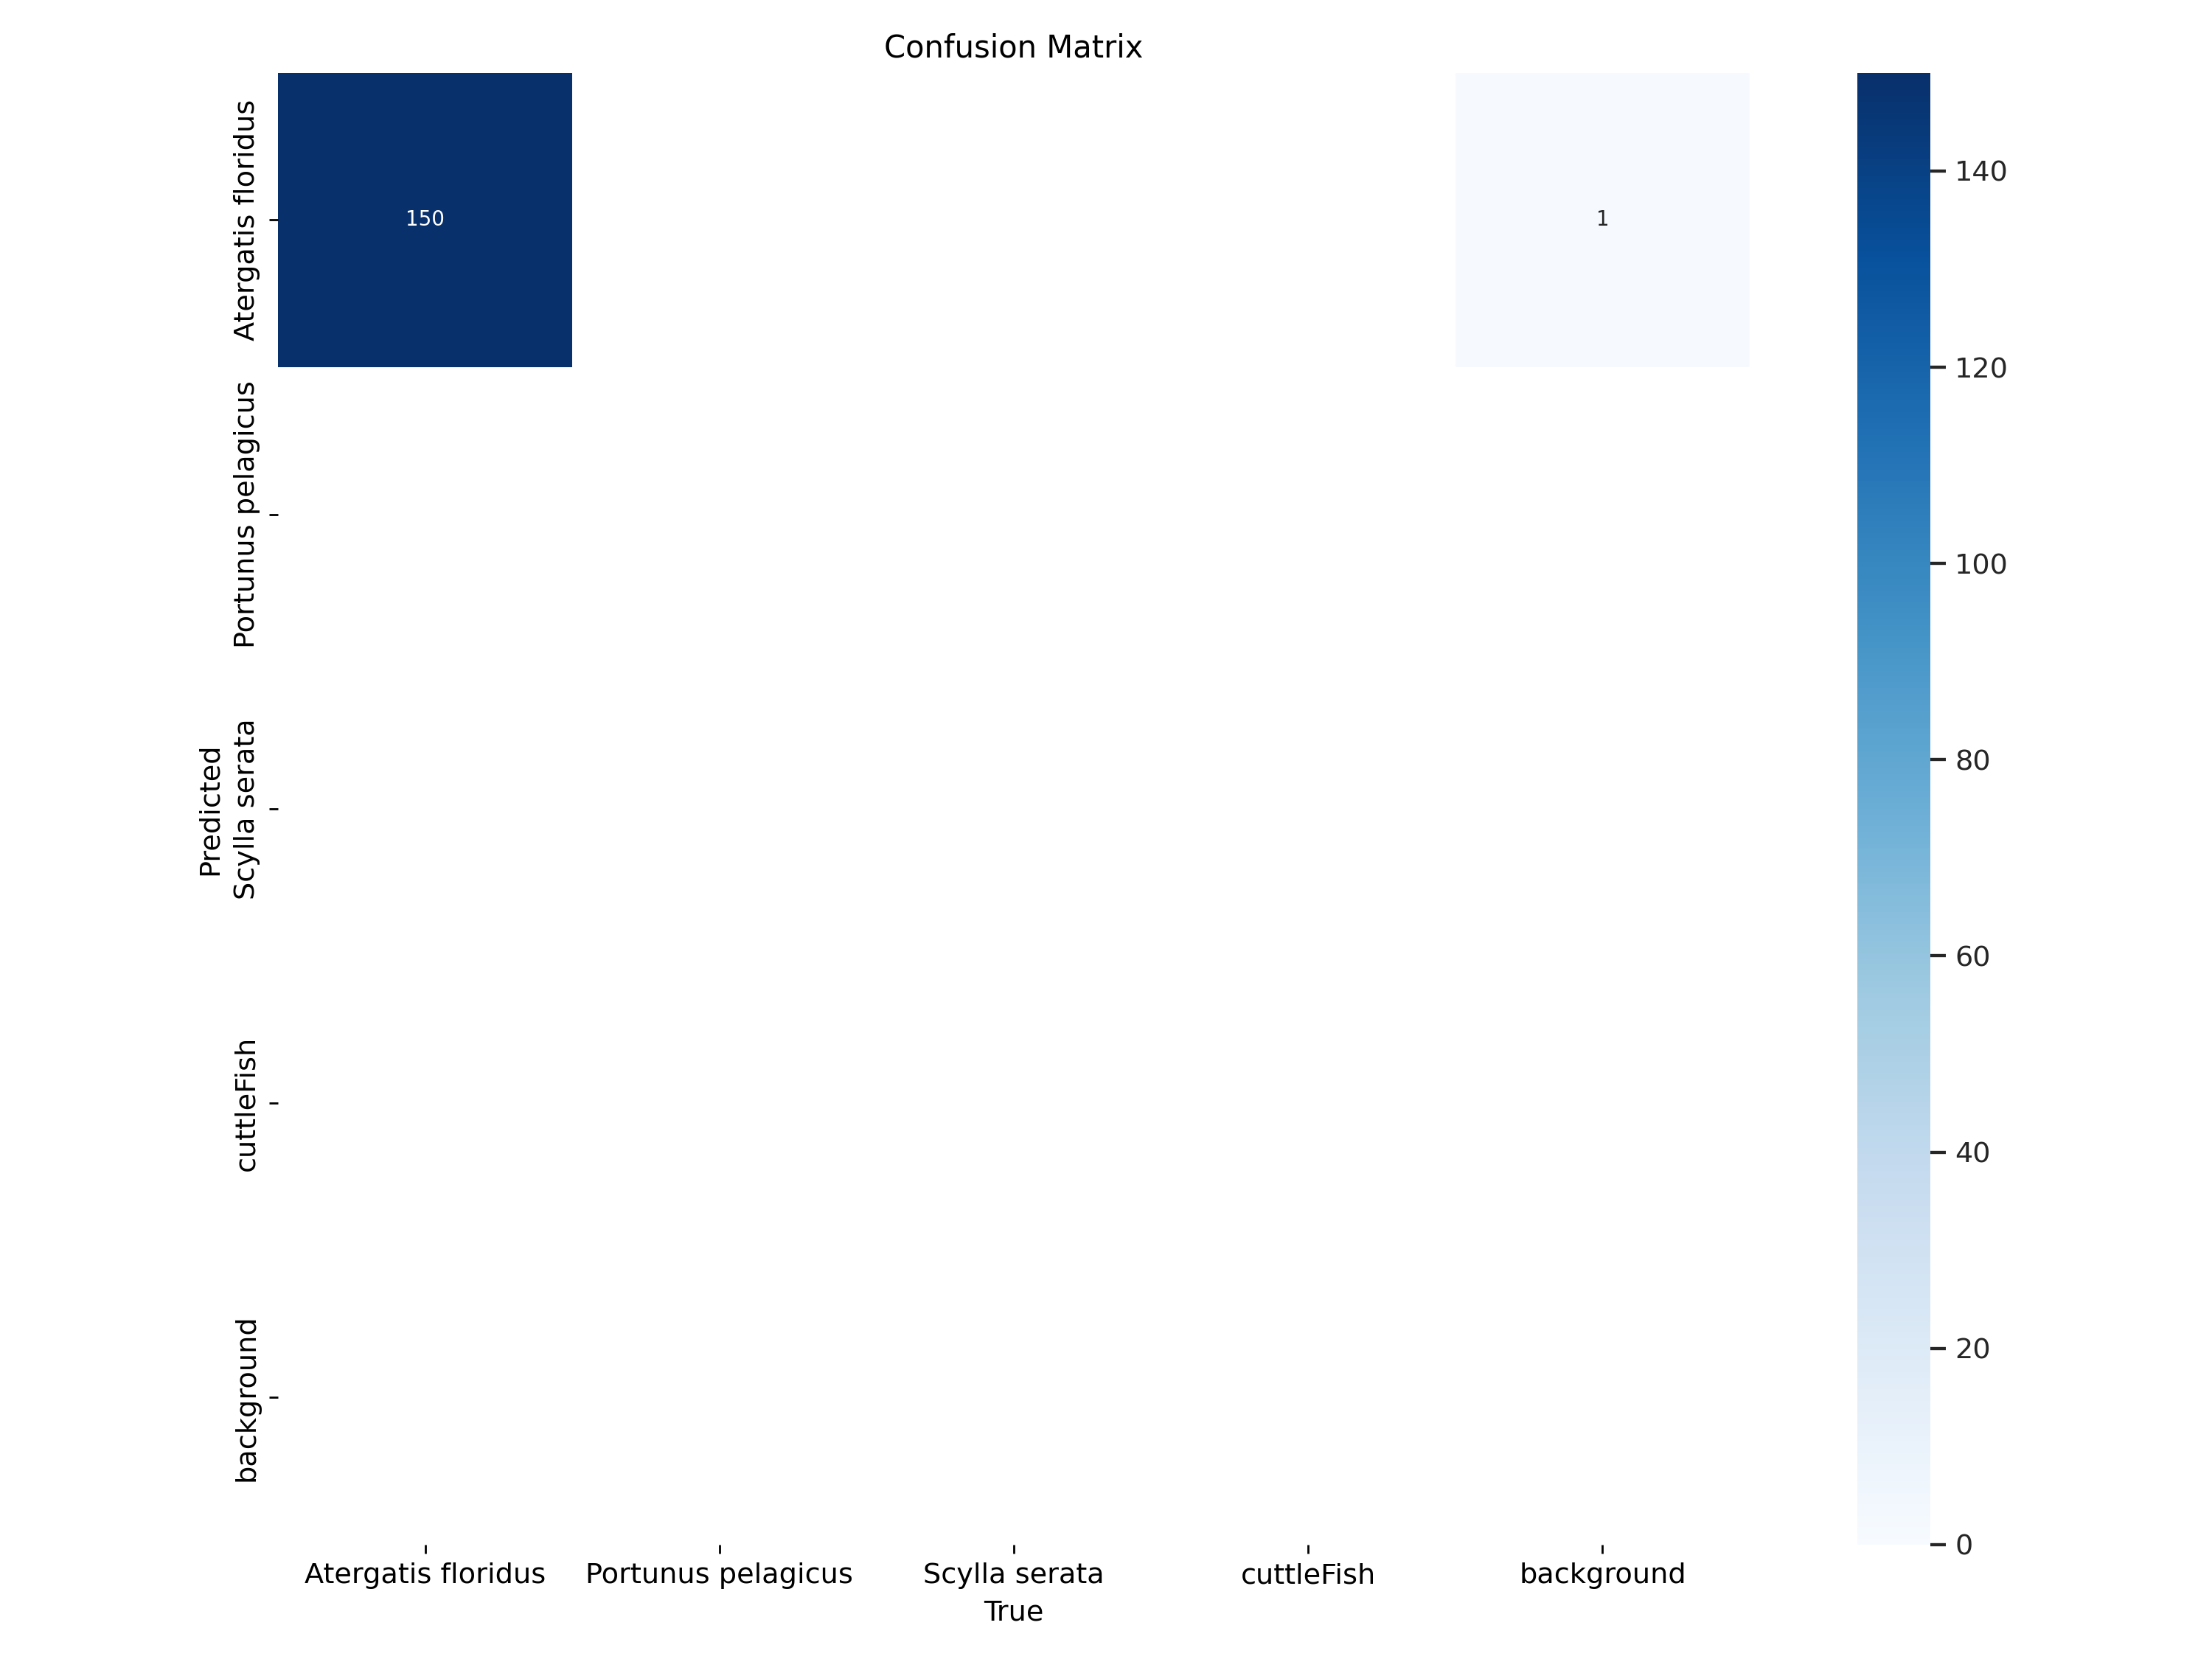

In [19]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content


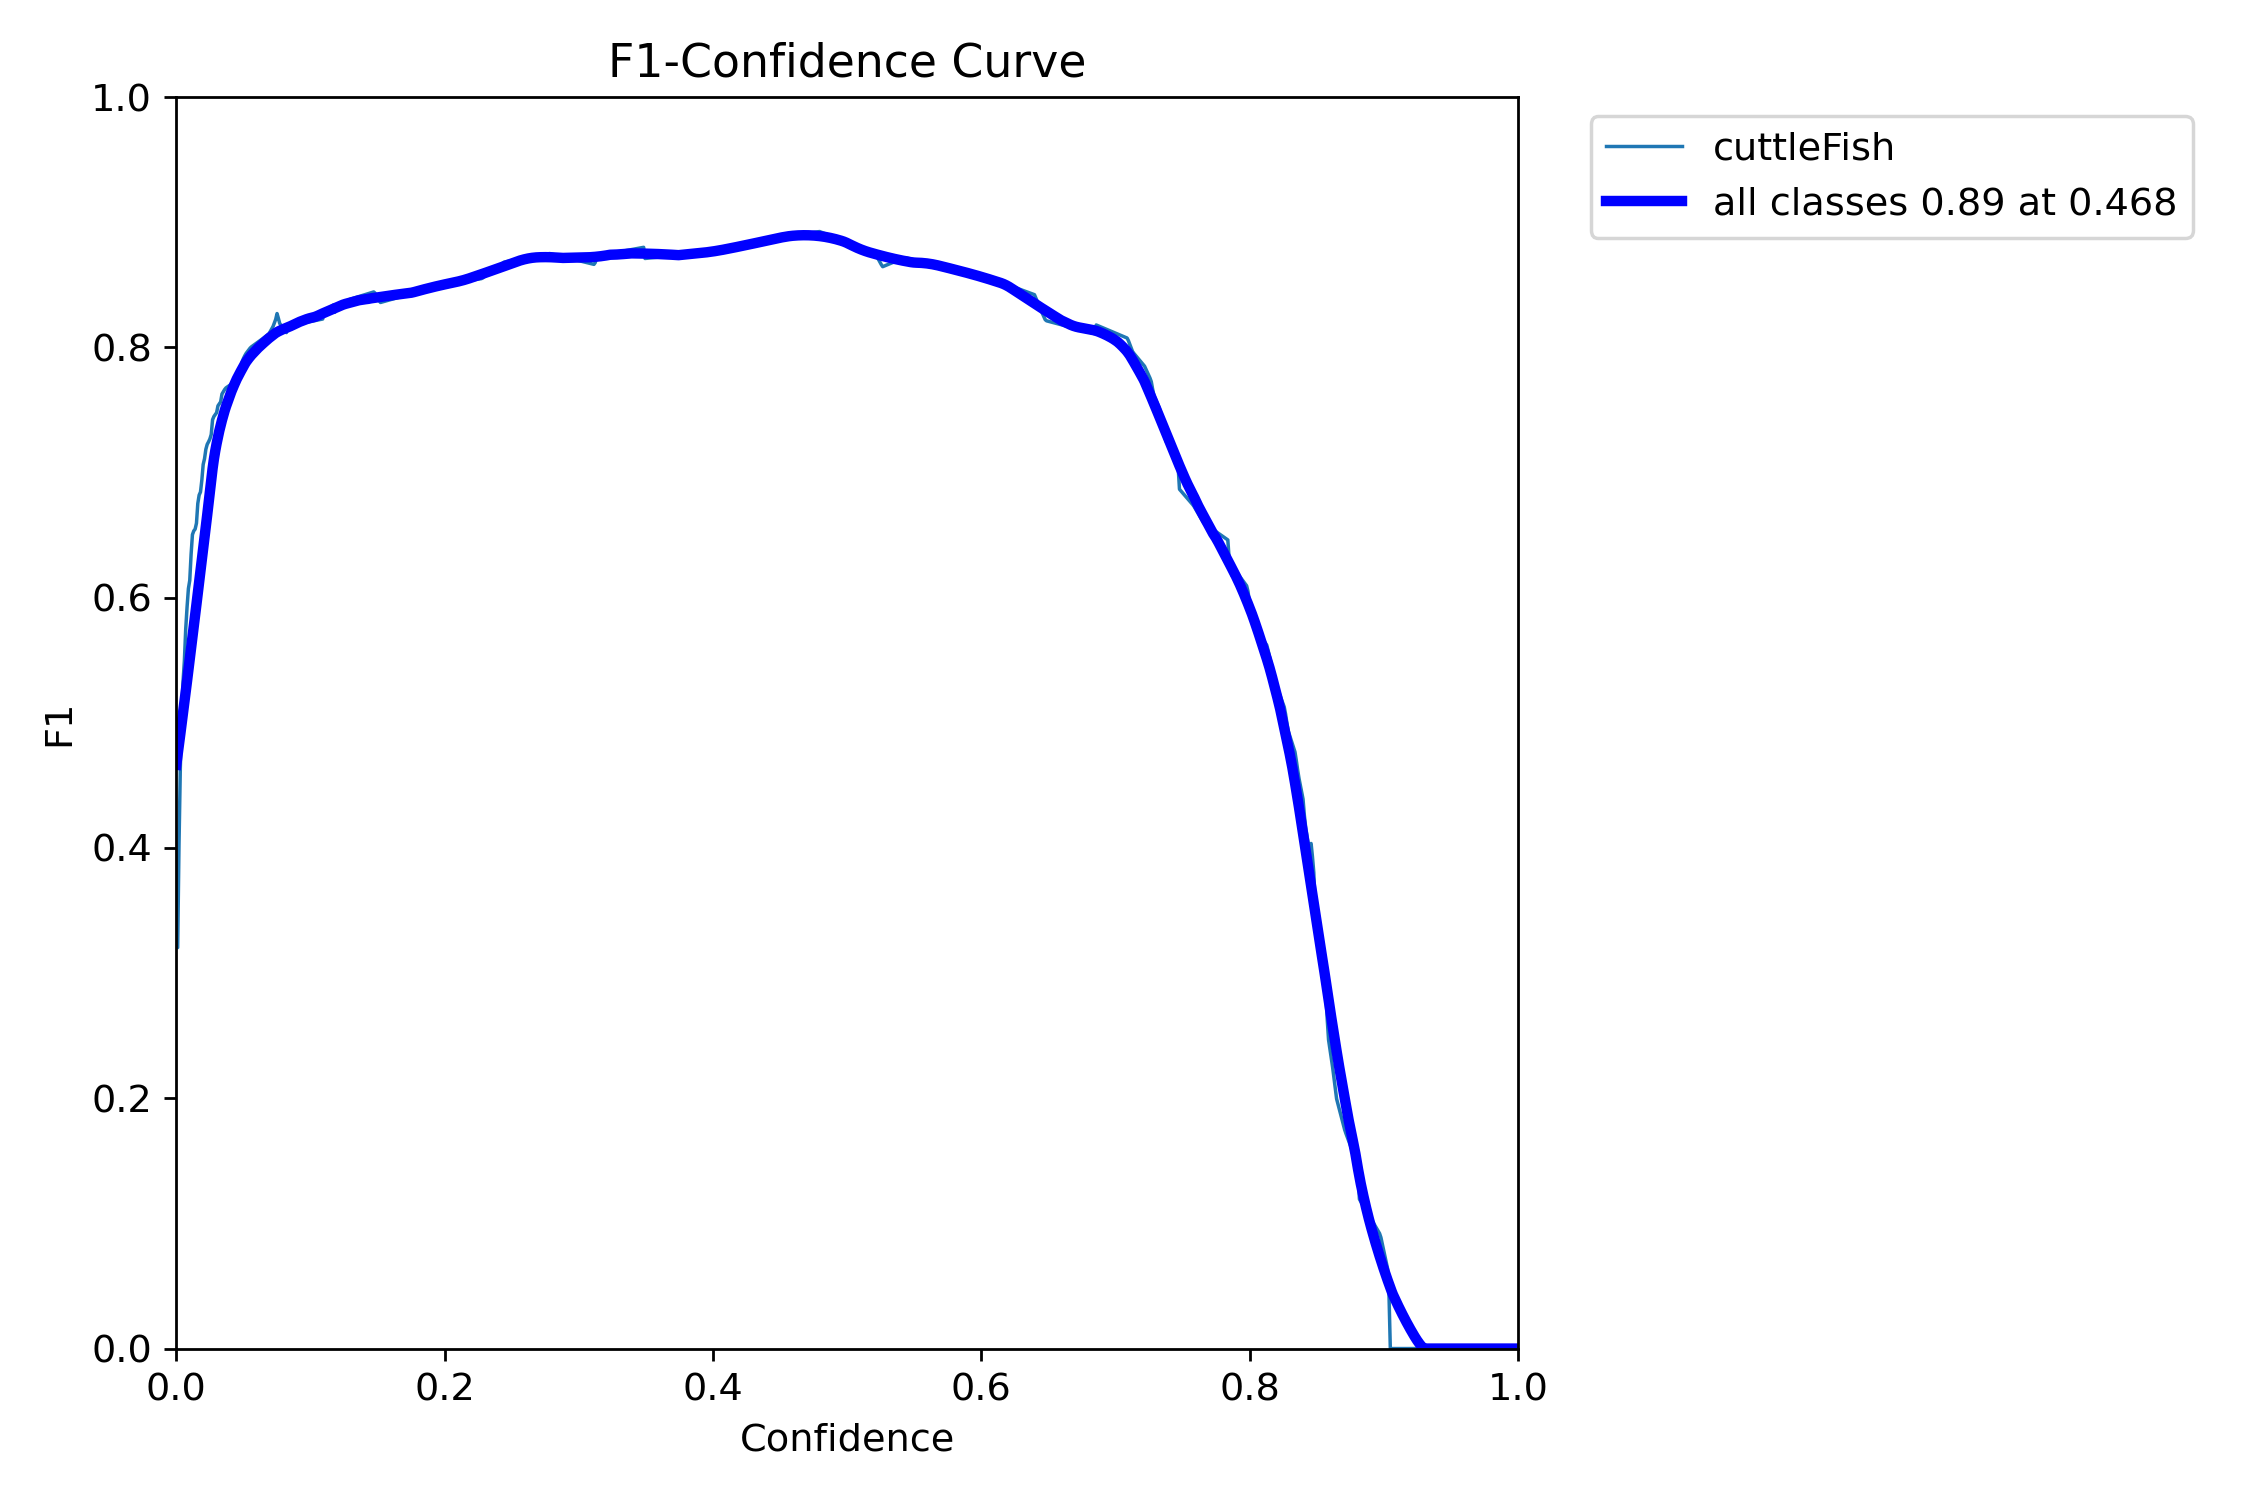

In [20]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train3/F1_curve.png', width=600)

/content


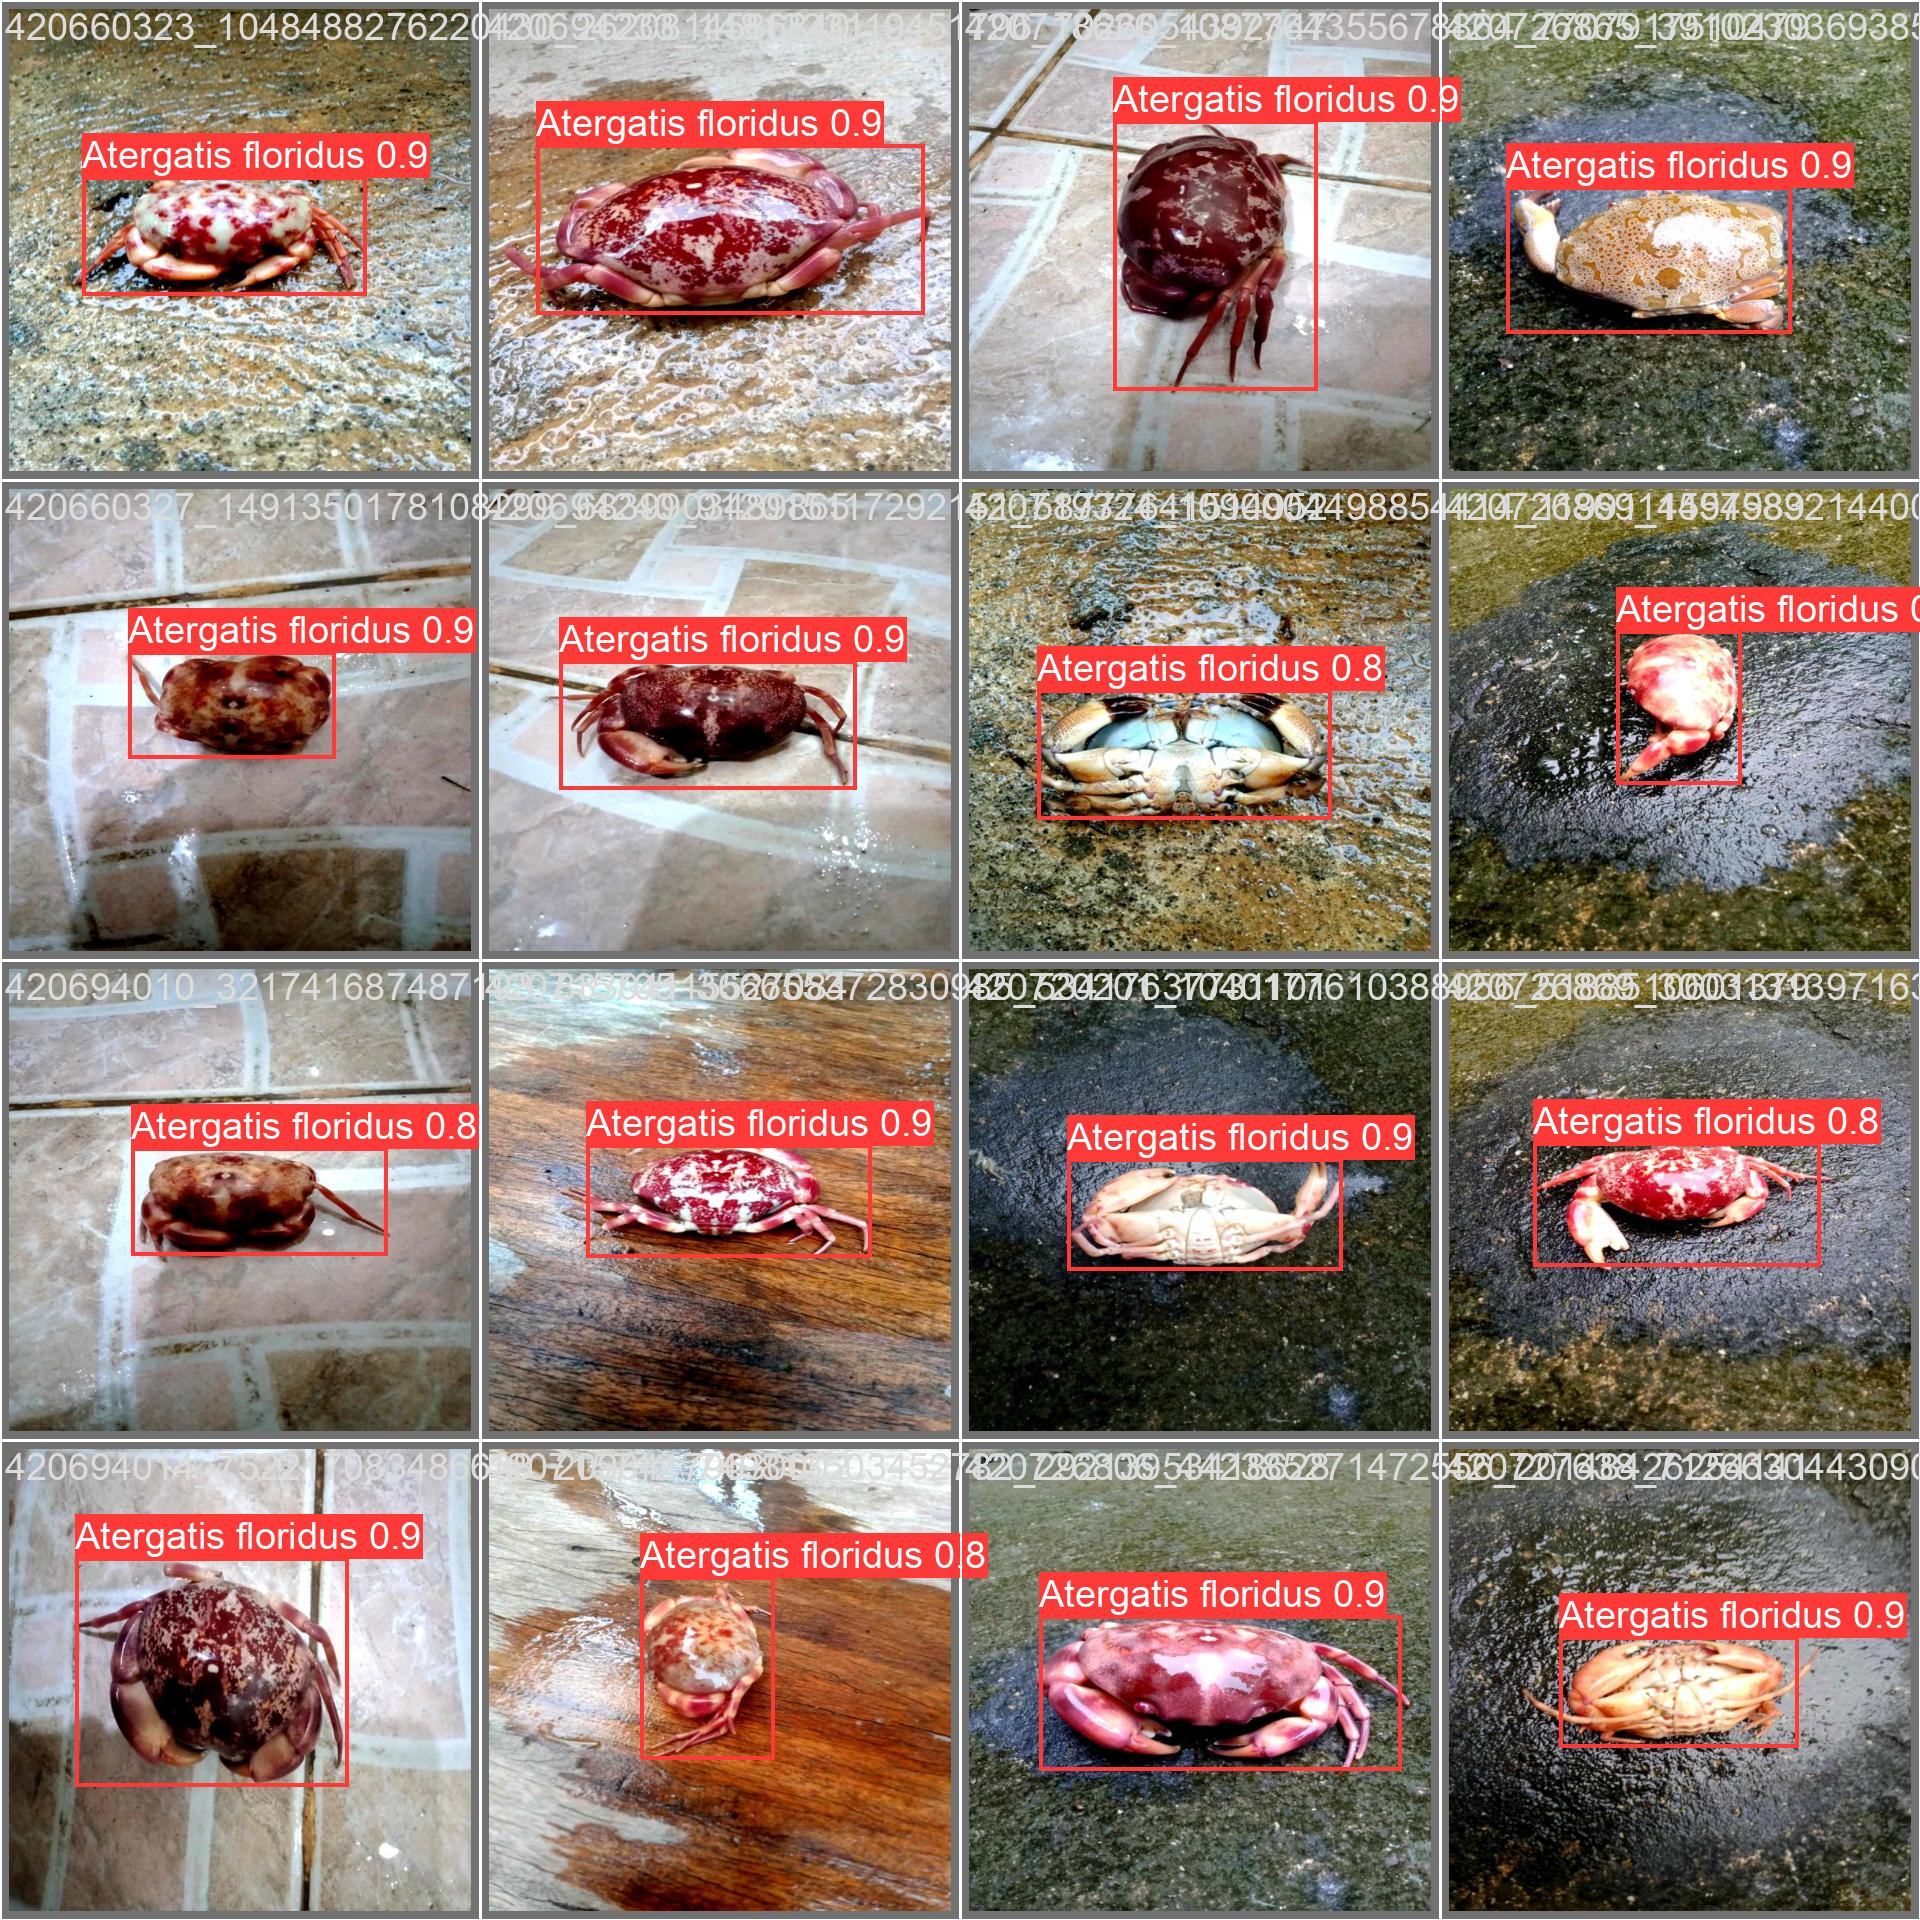

In [22]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train4/val_batch1_pred.jpg', width=600)

/content


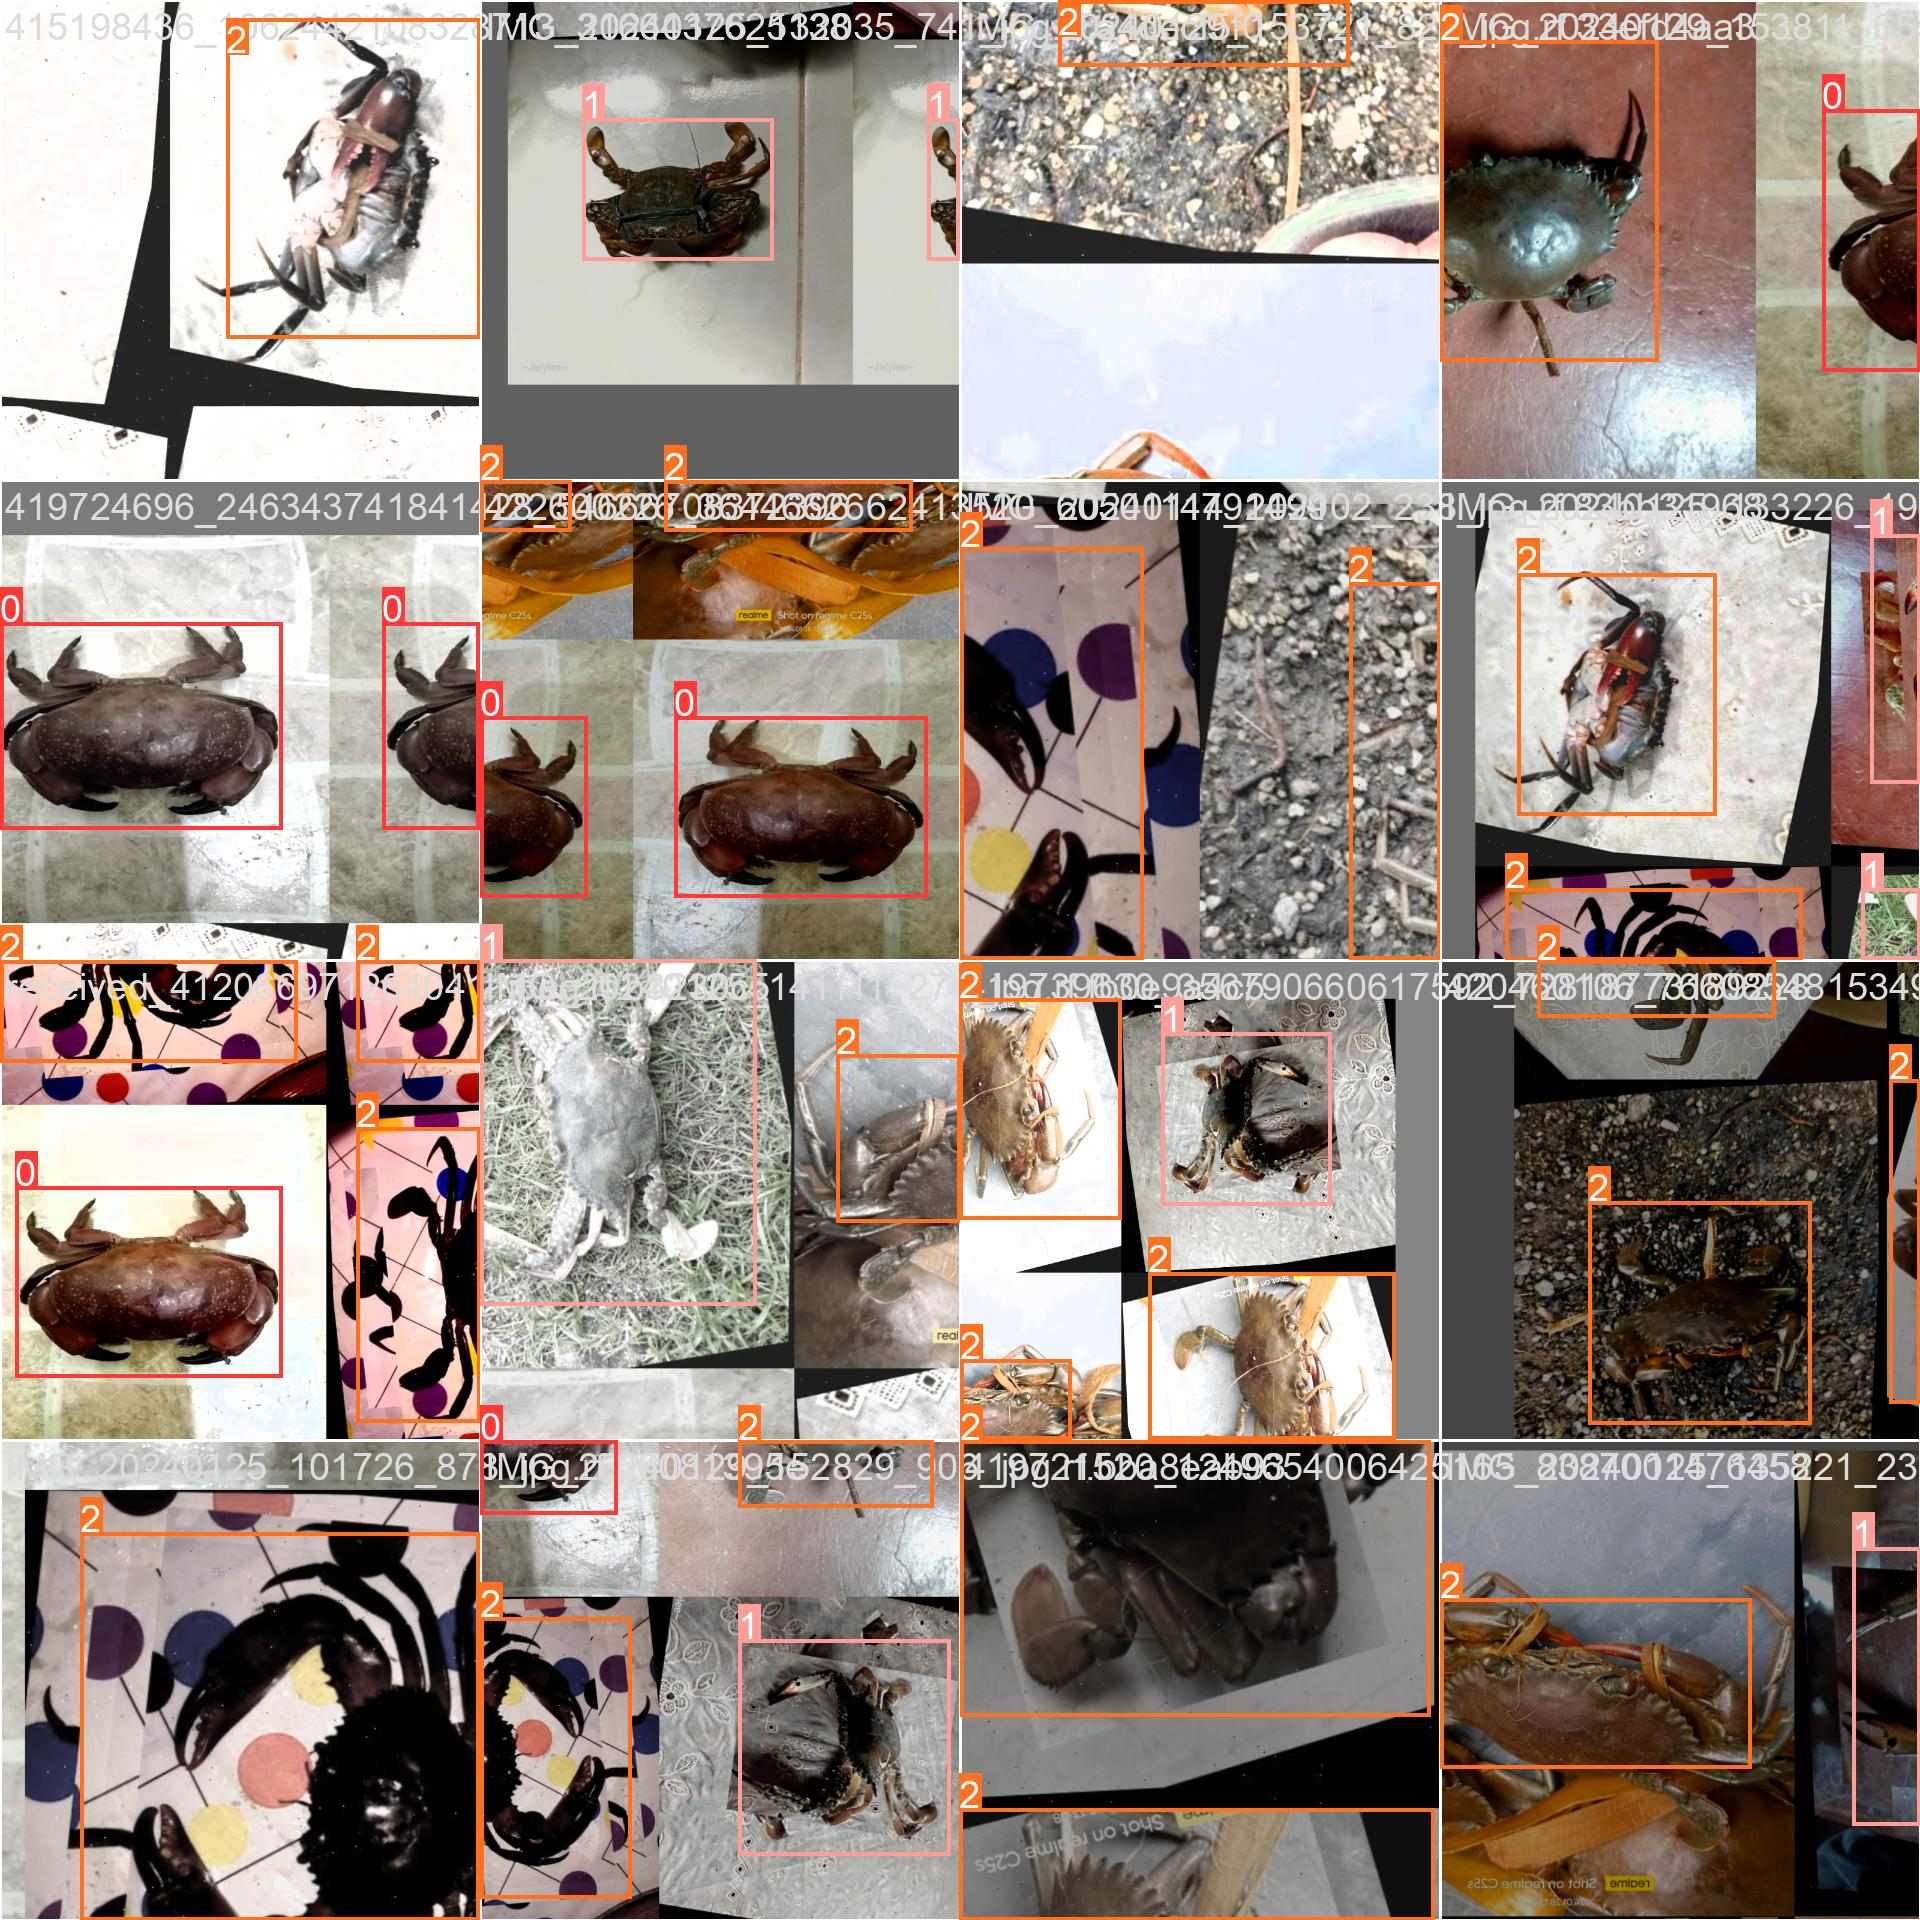

In [24]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train4/train_batch1.jpg', width=600)

/content


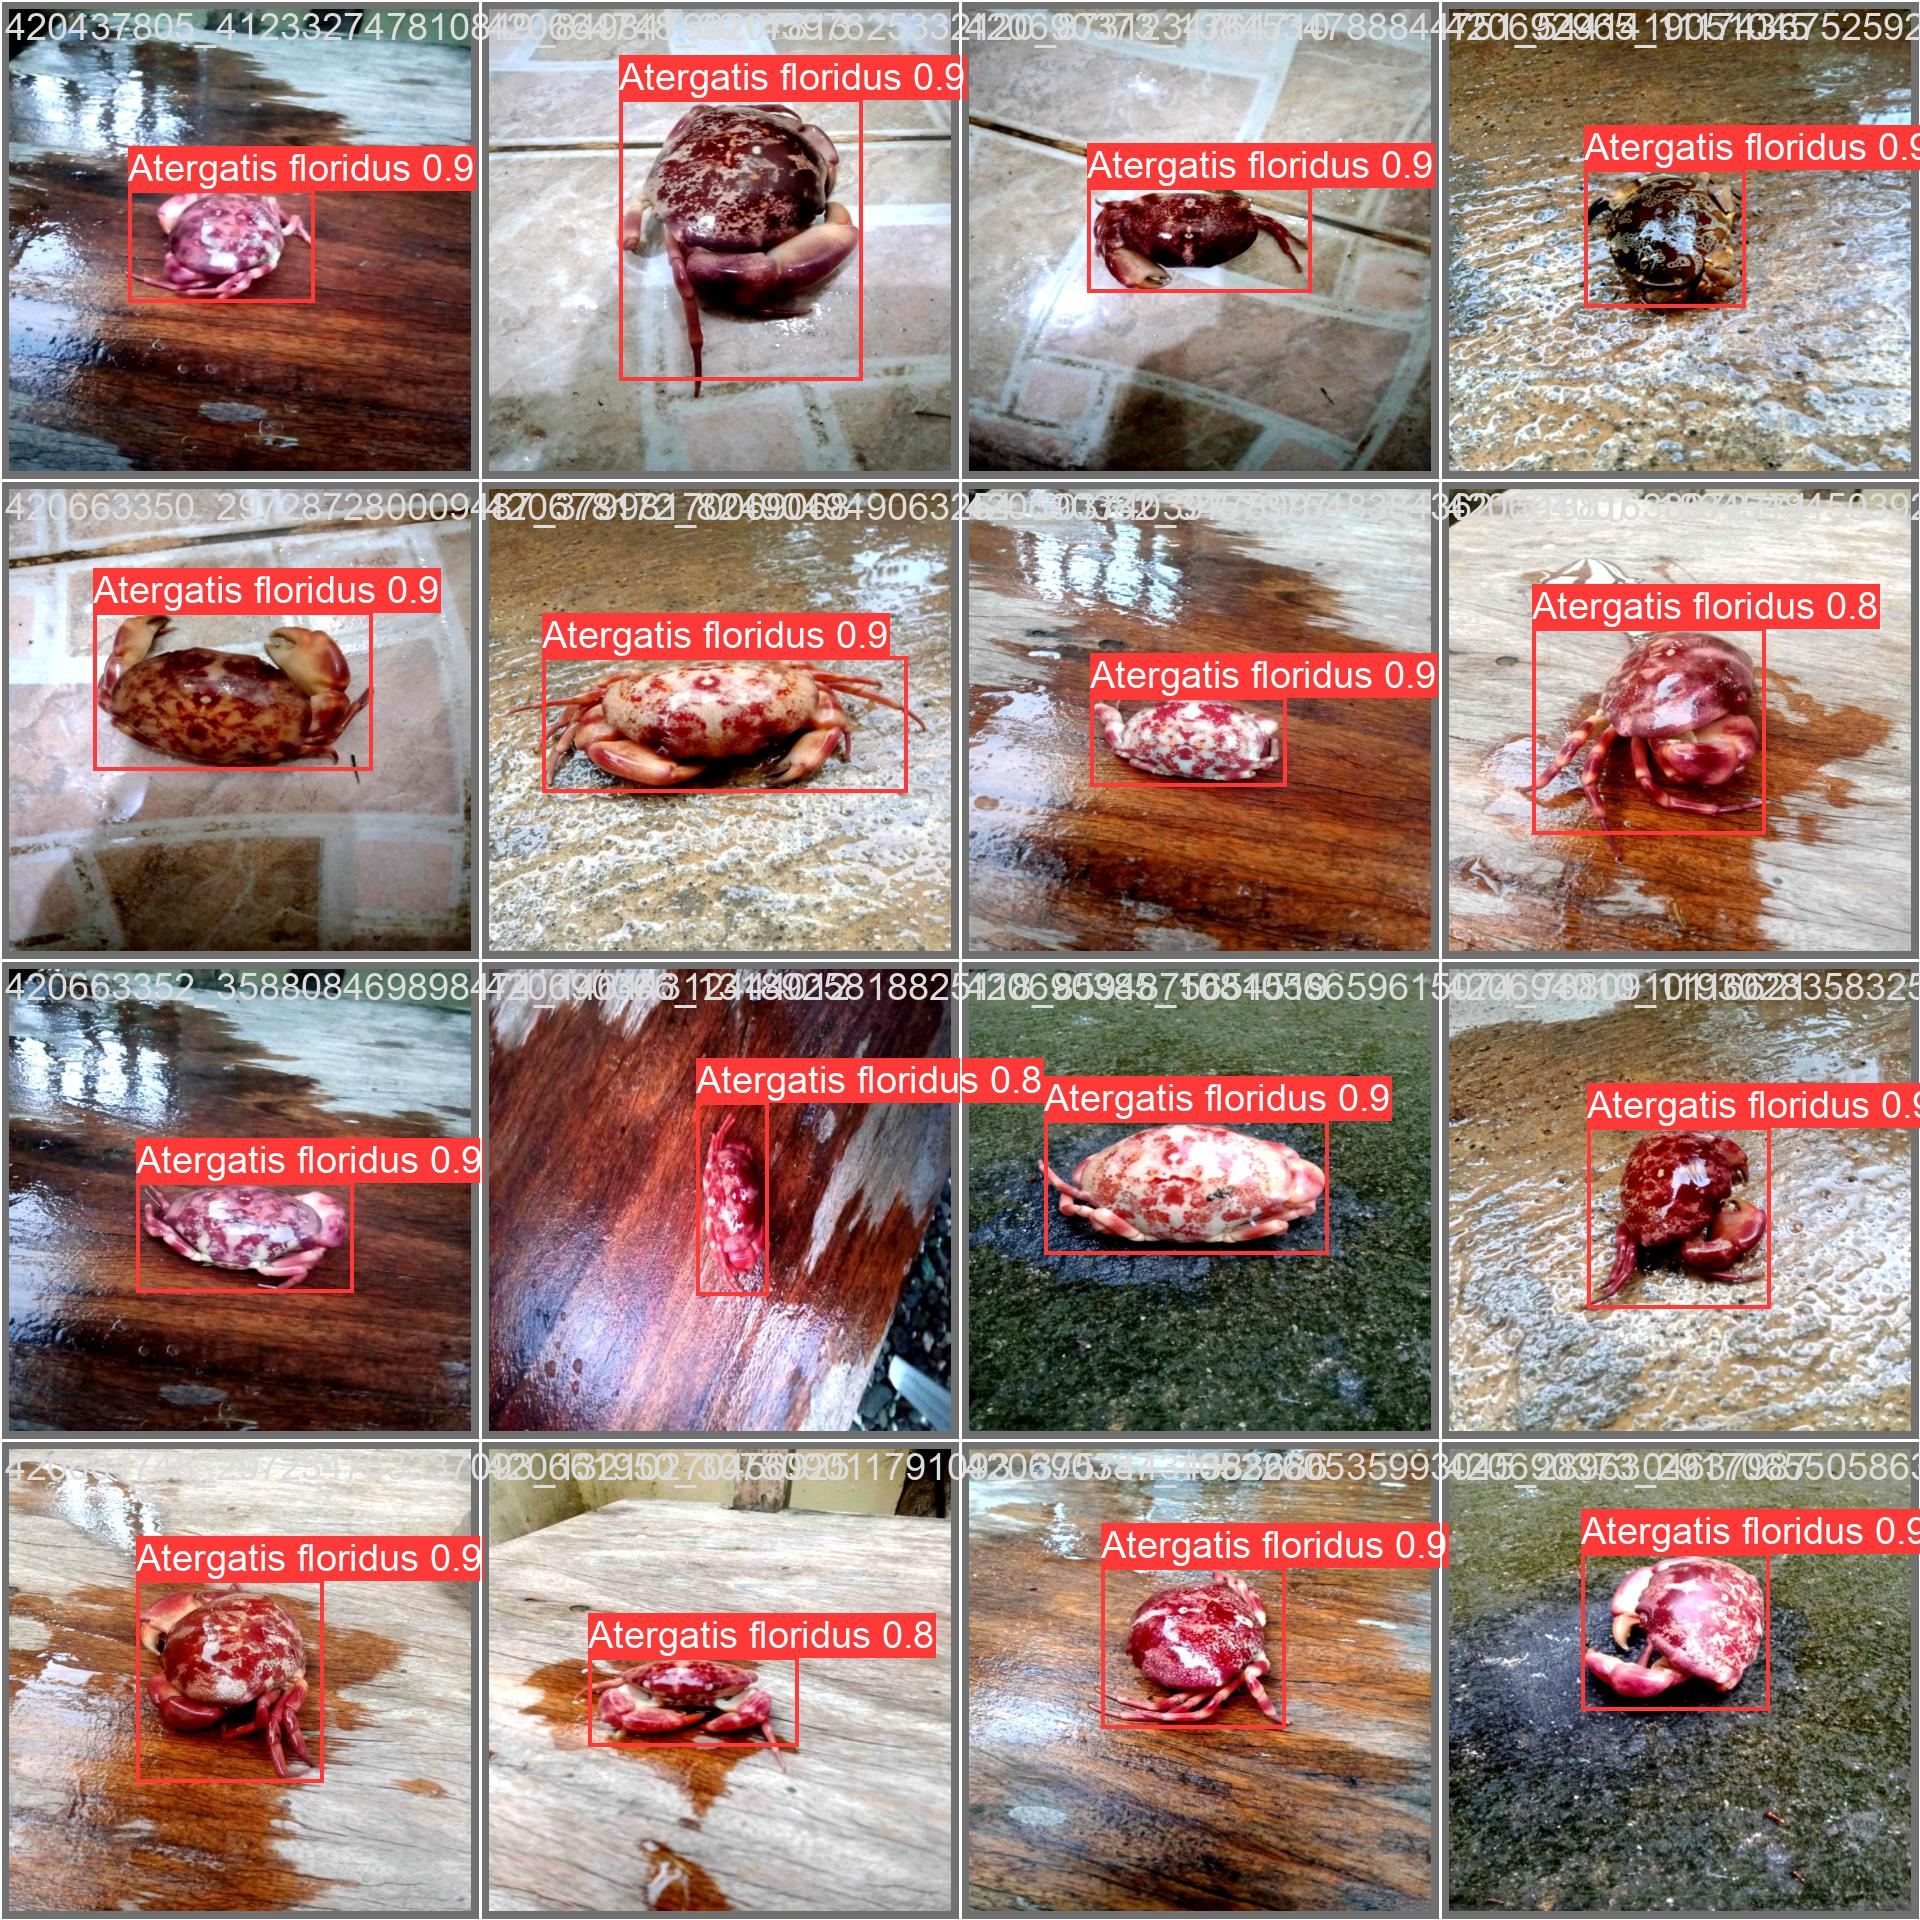

In [25]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [28]:
from ultralytics import YOLO

def list_model_classes(model_weights_path):
    model = YOLO(model_weights_path)
    class_names = model.model.names
    print("Available Classes:", class_names)

list_model_classes('/content/runs/detect/train3/weights/freeze.pt')

Available Classes: {0: 'cuttleFish'}


In [29]:
list_model_classes('/content/runs/detect/train4/weights/best.pt')

Available Classes: {0: 'Atergatis floridus', 1: 'Portunus pelagicus', 2: 'Scylla serata', 3: 'cuttleFish'}


In [30]:
!yolo task=detect mode=predict model= /content/runs/detect/train4/weights/best.pt conf=0.25 source= /content/crabcut.mp4 save=True

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/1179) /content/crabcut.mp4: 480x800 (no detections), 73.4ms
video 1/1 (frame 2/1179) /content/crabcut.mp4: 480x800 (no detections), 35.9ms
video 1/1 (frame 3/1179) /content/crabcut.mp4: 480x800 (no detections), 35.8ms
video 1/1 (frame 4/1179) /content/crabcut.mp4: 480x800 (no detections), 35.8ms
video 1/1 (frame 5/1179) /content/crabcut.mp4: 480x800 (no detections), 29.3ms
video 1/1 (frame 6/1179) /content/crabcut.mp4: 480x800 (no detections), 25.2ms
video 1/1 (frame 7/1179) /content/crabcut.mp4: 480x800 (no detections), 25.2ms
video 1/1 (frame 8/1179) /content/crabcut.mp4: 480x800 (no detections), 25.3ms
video 1/1 (frame 9/1179) /content/crabcut.mp4: 480x800 (no detections), 25.2ms
video 1/1 (frame 10/1179) /content/crabcut.mp4: 480x800 (no detections), 22.0ms
video 1/1 (frame 11/1179) /content/crabc

In [31]:
!yolo task=detect mode=predict model= /content/runs/detect/train3/weights/freeze.pt conf=0.25 source= /content/crabcut.mp4 save=True

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 71.1ms
video 1/1 (frame 2/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 35.9ms
video 1/1 (frame 3/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 35.8ms
video 1/1 (frame 4/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 35.8ms
video 1/1 (frame 5/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 35.8ms
video 1/1 (frame 6/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 35.8ms
video 1/1 (frame 7/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 29.8ms
video 1/1 (frame 8/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 23.5ms
video 1/1 (frame 9/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 23.5ms
video 1/1 (frame 10/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 23.1ms
video 1/1 (frame 11/1179) /content/crabcut.mp4: 480x800 1 cuttleFish, 

In [ ]:
# Testing with higher epochs and lower learning rate

%cd {HOME}

!yolo task=detect mode=train model= /content/runs/detect/train3/weights/freeze.pt data= /content/datasets/Crab-Detection-9/data.yaml epochs=100 imgsz=800

### Combining datasets first then training from scratch

In [32]:
import os
import shutil

# Define the paths to the source datasets
crab_paths = {
    'train_images': '/content/datasets/Crab-Detection-9/train/images',
    'train_labels': '/content/datasets/Crab-Detection-9/train/labels',
    'valid_images': '/content/datasets/Crab-Detection-9/valid/images',
    'valid_labels': '/content/datasets/Crab-Detection-9/valid/labels',
    'test_images': '/content/datasets/Crab-Detection-9/test/images',
    'test_labels': '/content/datasets/Crab-Detection-9/test/labels'
}

cuttle_paths = {
    'train_images': '/content/datasets/Cuttle_fish-1/train/images',
    'train_labels': '/content/datasets/Cuttle_fish-1/train/labels',
    'valid_images': '/content/datasets/Cuttle_fish-1/valid/images',
    'valid_labels': '/content/datasets/Cuttle_fish-1/valid/labels',
    'test_images': '/content/datasets/Cuttle_fish-1/test/images',
    'test_labels': '/content/datasets/Cuttle_fish-1/test/labels'
}

# Define the new dataset directory
new_dataset_dir = '/content/datasets/crabcut'

# Create new dataset structure
for key in crab_paths.keys():
    new_path = os.path.join(new_dataset_dir, key.split('_')[0], key.split('_')[1])
    os.makedirs(new_path, exist_ok=True)

def copy_files(src_dir, dest_dir):
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        dest_file = os.path.join(dest_dir, filename)
        shutil.copy(src_file, dest_file)

# Copy files from both datasets to the new dataset directory
for key, path in crab_paths.items():
    new_path = os.path.join(new_dataset_dir, key.split('_')[0], key.split('_')[1])
    copy_files(path, new_path)

for key, path in cuttle_paths.items():
    new_path = os.path.join(new_dataset_dir, key.split('_')[0], key.split('_')[1])
    copy_files(path, new_path)


In [33]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data= /content/datasets/crabcut/data.yaml epochs=45 imgsz=800

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/crabcut/data.yaml, epochs=45, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [34]:
!ls /content/runs/detect/train5

args.yaml					     R_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	   val_batch0_pred.jpg
confusion_matrix.png				     results.png	   val_batch1_labels.jpg
events.out.tfevents.1713183668.3e7877e2ce3e.93451.0  train_batch0.jpg	   val_batch1_pred.jpg
F1_curve.png					     train_batch12810.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch12811.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch12812.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


/content


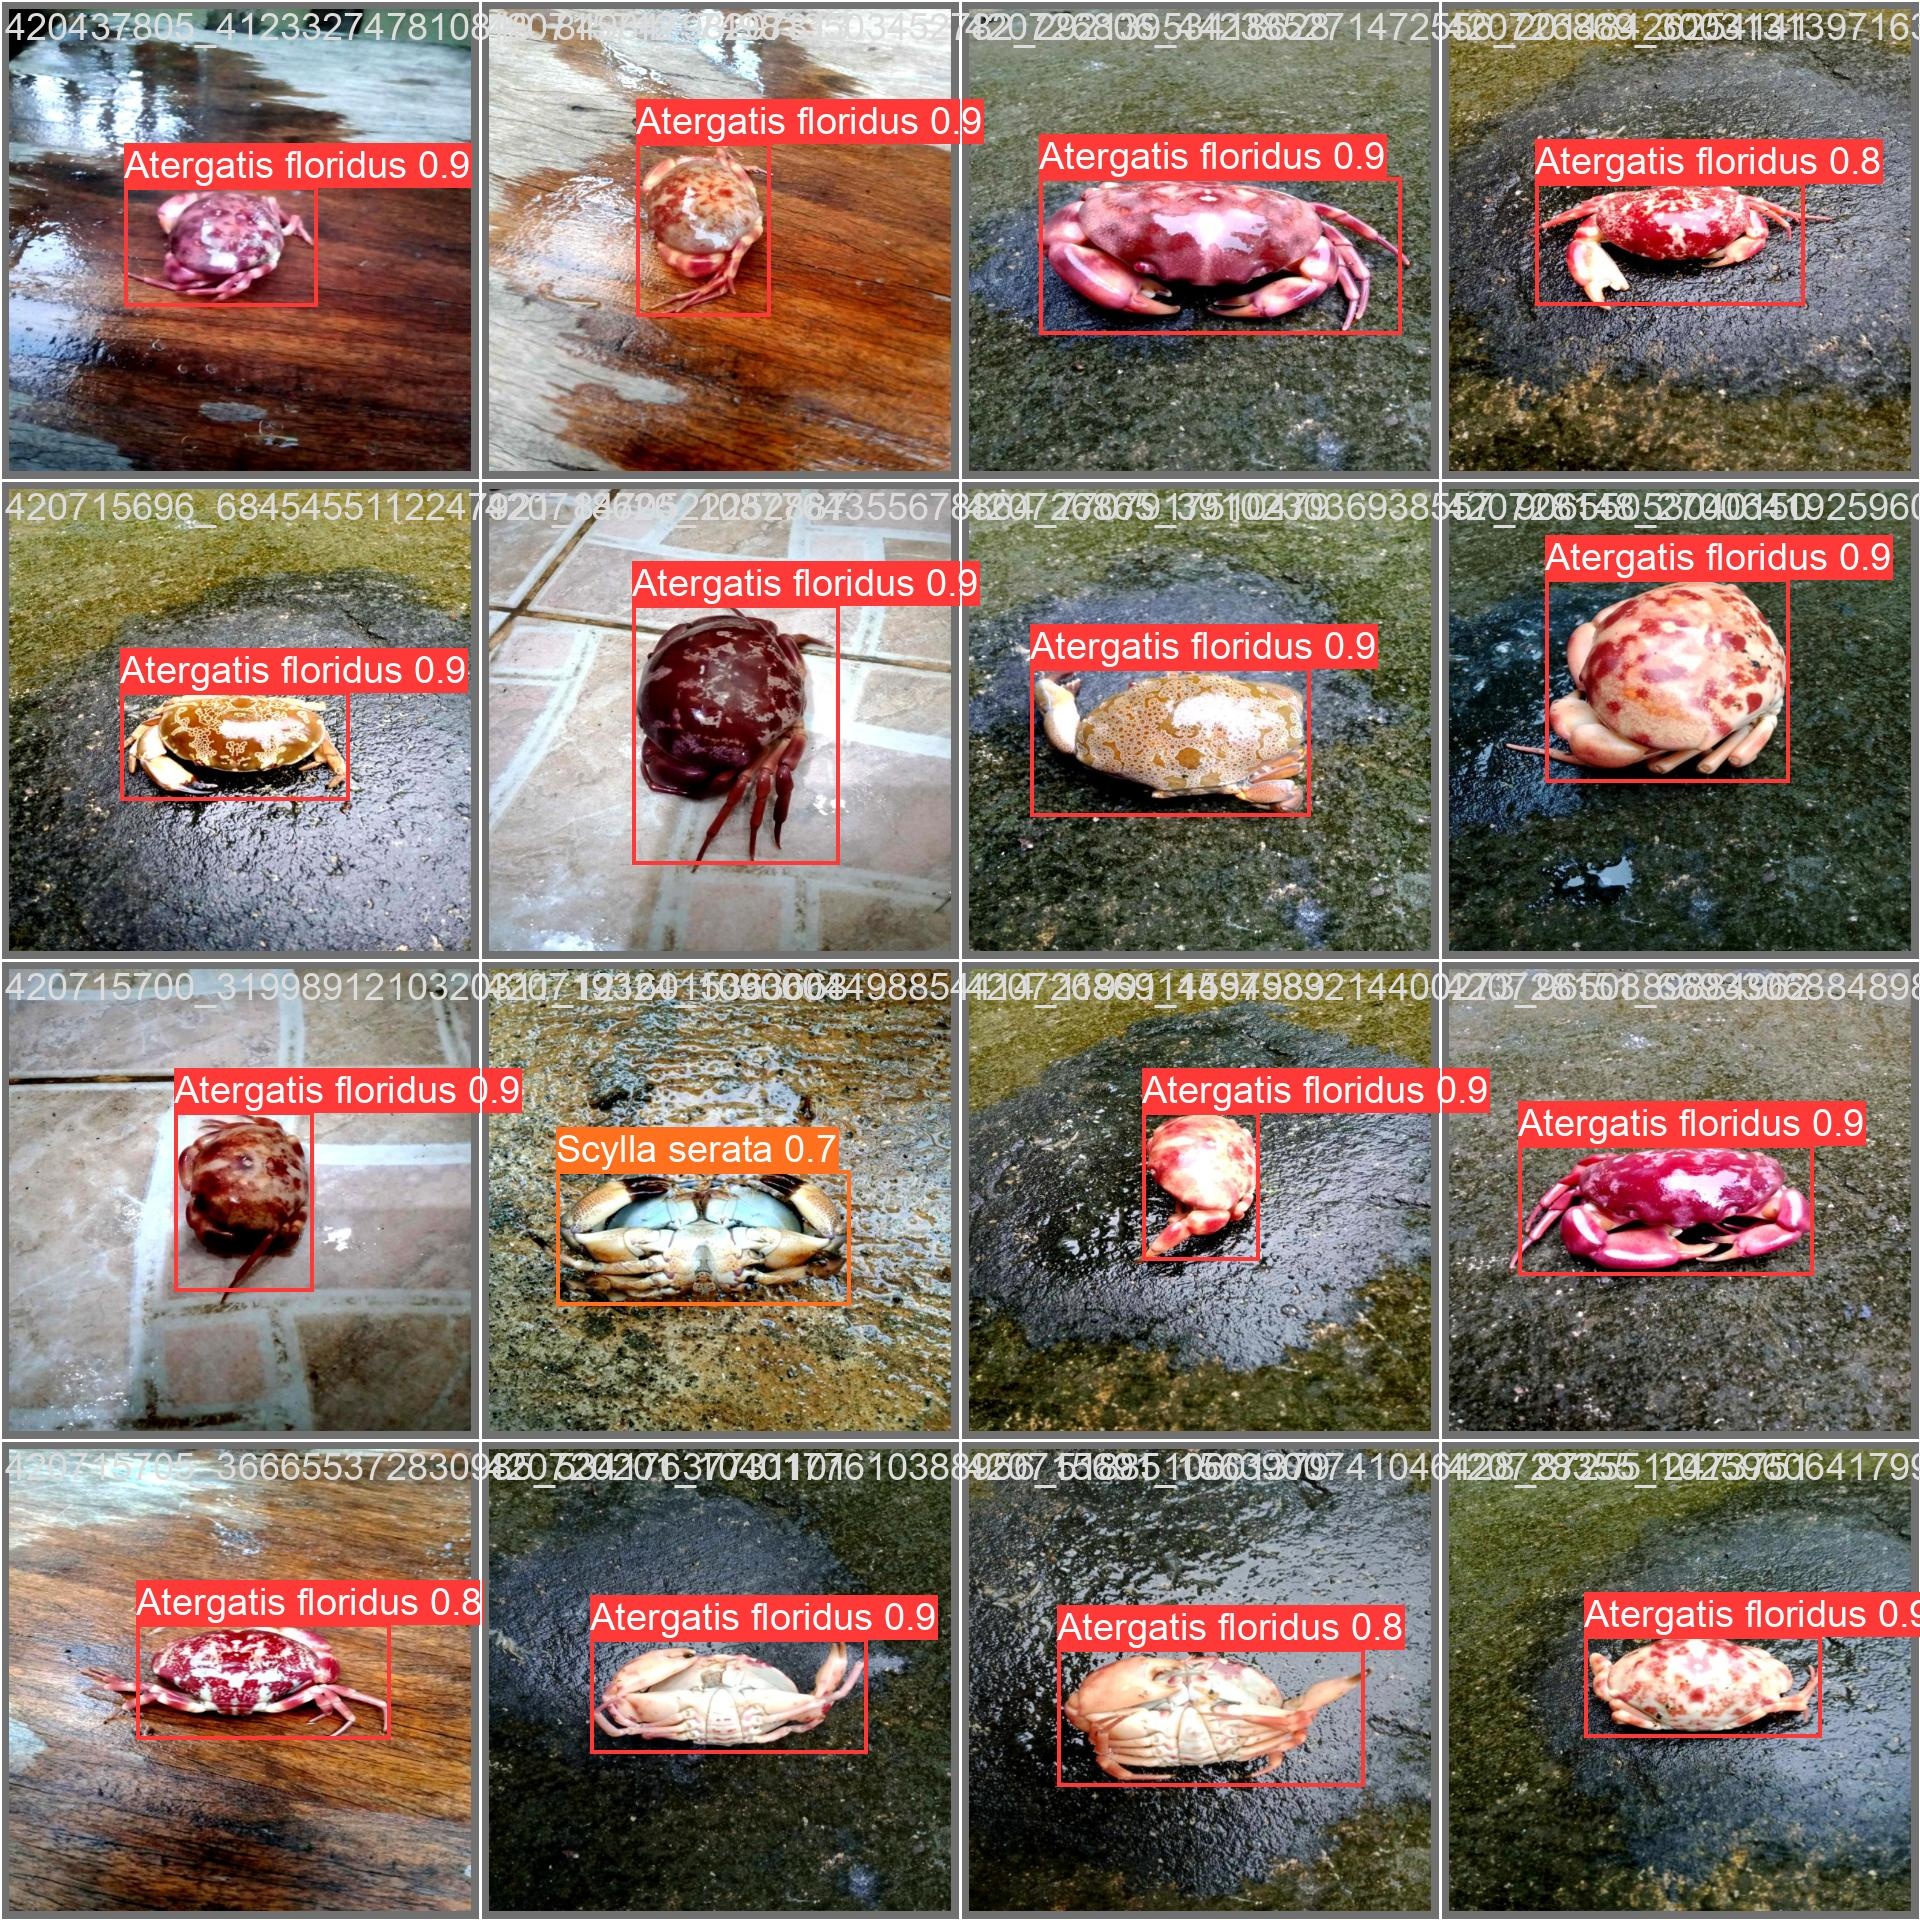

In [37]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

/content


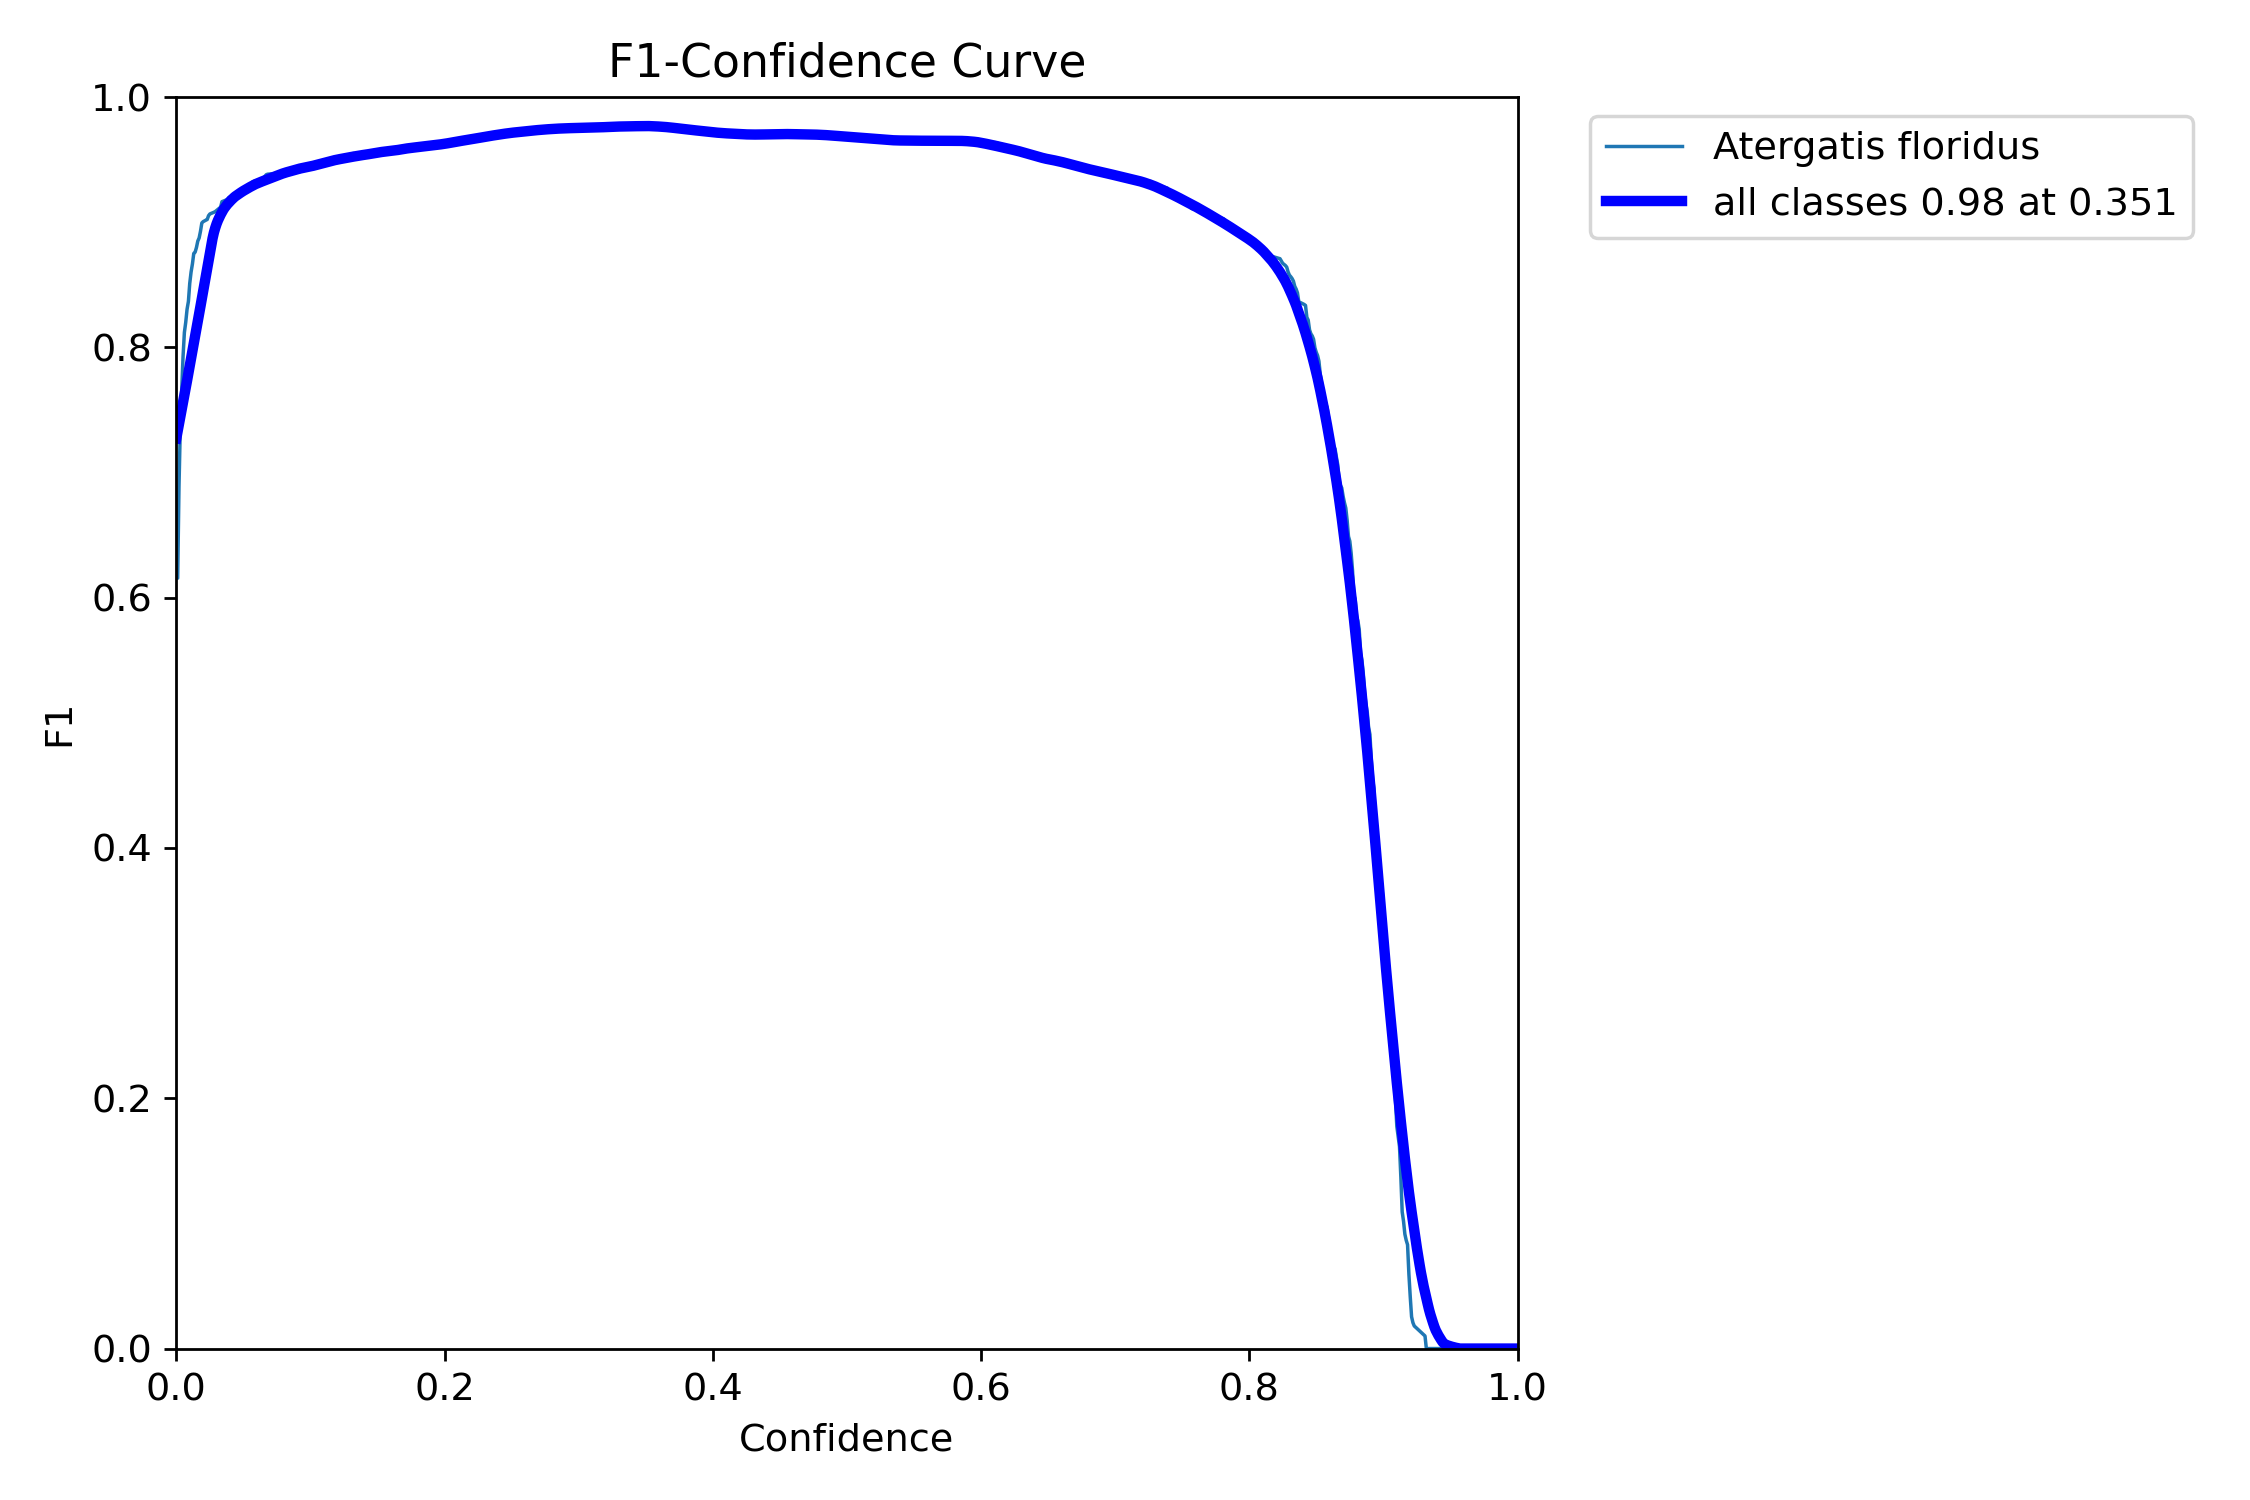

In [36]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train5/F1_curve.png', width=600)

/content


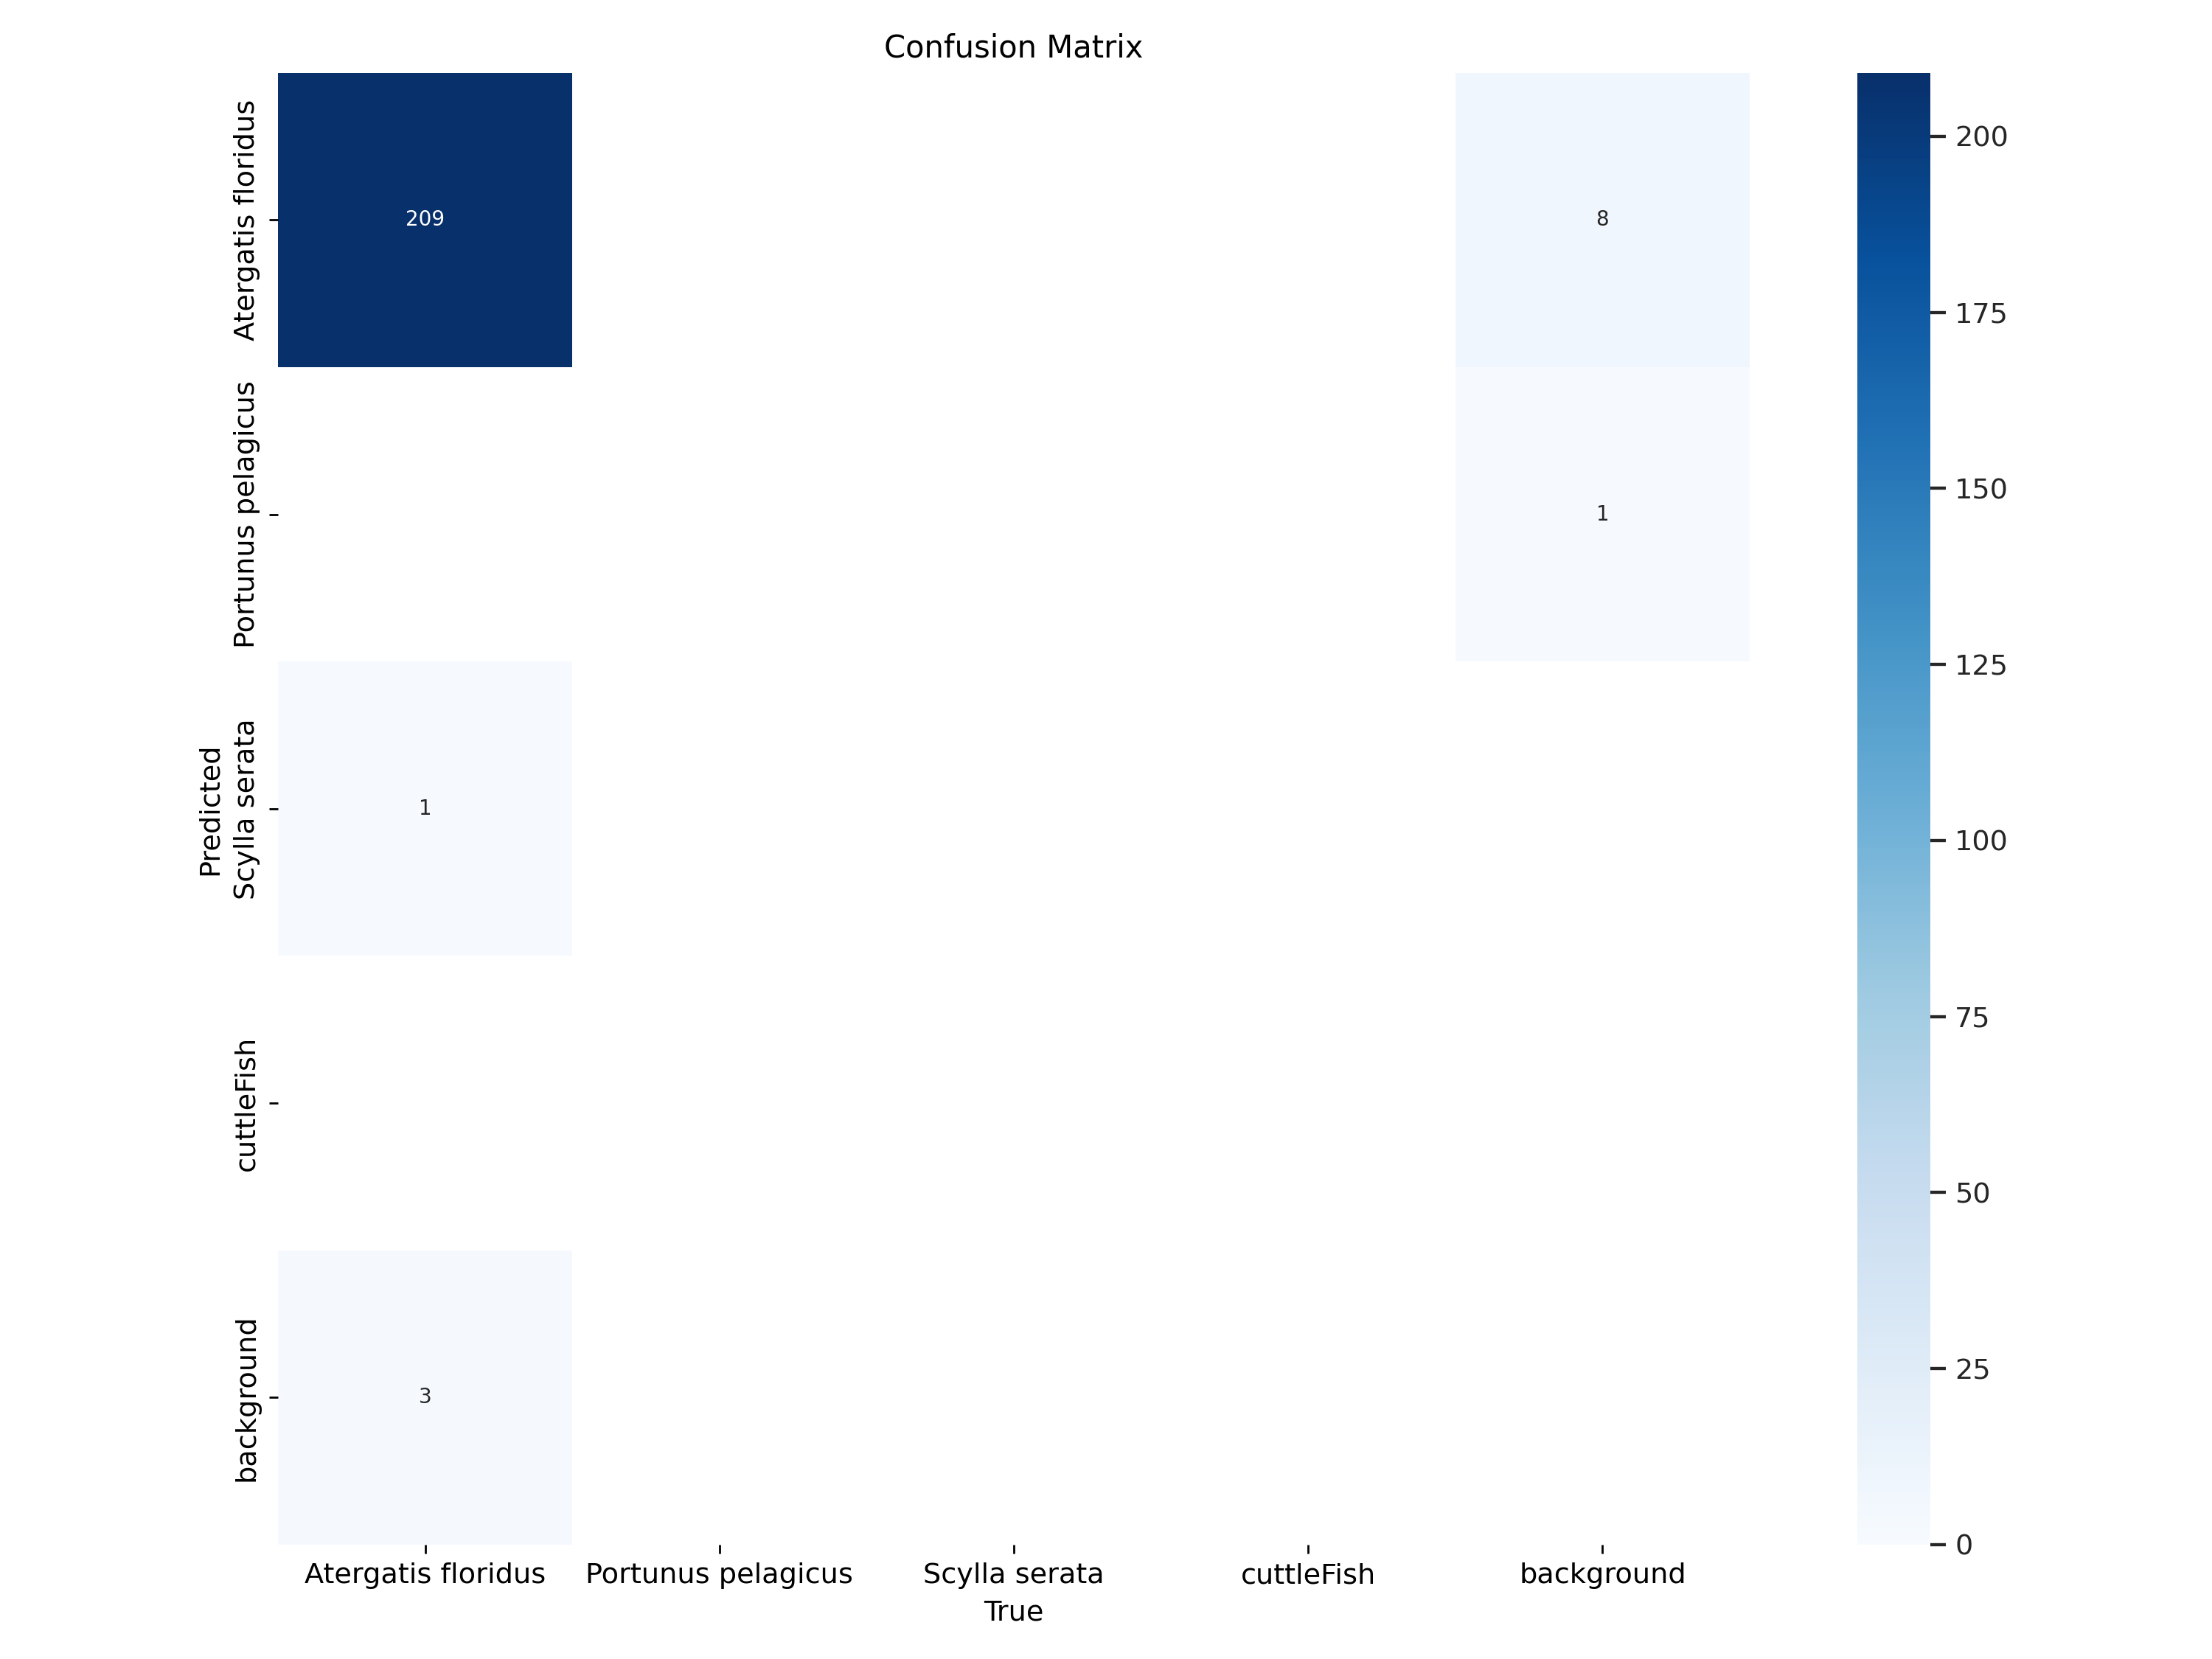

In [35]:
%cd {HOME}
from IPython.display import display, Image
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

In [38]:
list_model_classes('/content/runs/detect/train5/weights/best.pt')

Available Classes: {0: 'Atergatis floridus', 1: 'Portunus pelagicus', 2: 'Scylla serata', 3: 'cuttleFish'}


In [39]:
!yolo task=detect mode=predict model= /content/runs/detect/train5/weights/best.pt conf=0.25 source= /content/crabcut.mp4 save=True

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 73.9ms
video 1/1 (frame 2/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 35.9ms
video 1/1 (frame 3/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 35.8ms
video 1/1 (frame 4/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 35.8ms
video 1/1 (frame 5/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 35.9ms
video 1/1 (frame 6/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 35.9ms
video 1/1 (frame 7/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 35.7ms
video 1/1 (frame 8/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 22.6ms
video 1/1 (frame 9/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridus, 22.6ms
video 1/1 (frame 10/1179) /content/crabcut.mp4: 480x800 1 Atergatis floridu